# Main Modelling for Time Series Store forecast 
* By Alex Dance https://www.linkedin.com/in/alex-dance/
* This notebook is one of several notebooks for a project to improve store and product forecasts
1.	EDA – Exploratory Data Analysis – includes working with annual forecasts
2.	Main Modelling
3.	XG Boost modelling by Month
4.	Weighted average
5.	ARIMA – Month and Other Modelling
6.	Deep Learning

It also utilises time series forecast options using Amazon which include
- Amazon Forecast
- Prophet 
- Auto 365
- ARIMA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier
from catboost import CatBoostRegressor
from sklearn.metrics import accuracy_score

In [3]:
class color:  # Testing to make the heading look a liitle more impressive
   BOLD = '\033[1m'

In [4]:
df = pd.read_csv(r'C:/Users/sasha/Alex_Python_Folder/Sept 23 -Capstone Time Series By Alex Dance - Final/Capstone Data/train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
split = "2017-01-01"

In [6]:
df['date'] =  pd.to_datetime(df['date'])

# Feature Engineering

In [7]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [8]:
split = "2017-01-01"

In [9]:
df['ItemStoreCombined'] = df['item'].map(str) + '-' + df['store'].map(str) 
# this is used in particular to ensure the rolling forecast data does not leak from 1 item / store combination to the next

In [10]:
df.head()

,date,store,item,sales,ItemStoreCombined
0,2013-01-01,1,1,13,1-1
1,2013-01-02,1,1,11,1-1
2,2013-01-03,1,1,14,1-1
3,2013-01-04,1,1,13,1-1
4,2013-01-05,1,1,10,1-1


In [11]:

df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.weekofyear

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\316914840.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [12]:
df_roll=df.copy() # for the rolling forecast

In [13]:
# for rolling forecast
df_roll['sales-1'] = df_roll.groupby('ItemStoreCombined')['sales'].rolling(1).mean().reset_index(0,drop=True)
df_roll['sales-2'] = df_roll.groupby('ItemStoreCombined')['sales'].rolling(2).mean().reset_index(0,drop=True)
df_roll['sales-3'] = df_roll.groupby('ItemStoreCombined')['sales'].rolling(3).mean().reset_index(0,drop=True)
df_roll['sales-4'] = df_roll.groupby('ItemStoreCombined')['sales'].rolling(4).mean().reset_index(0,drop=True)
df_roll['sales-5'] = df_roll.groupby('ItemStoreCombined')['sales'].rolling(5).mean().reset_index(0,drop=True)
df_roll['sales-6'] = df_roll.groupby('ItemStoreCombined')['sales'].rolling(6).mean().reset_index(0,drop=True)
df_roll['sales-7'] = df_roll.groupby('ItemStoreCombined')['sales'].rolling(7).mean().reset_index(0,drop=True)

In [14]:
df_roll.head(5)

,date,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7
0,2013-01-01,1,1,13,1-1,1,1,1,2013,1,1,1,13.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11,1-1,2,1,1,2013,2,2,1,11.0,12.0,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,1,1,14,1-1,3,1,1,2013,3,3,1,14.0,12.5,12.666667,NaN,NaN,NaN,NaN
3,2013-01-04,1,1,13,1-1,4,1,1,2013,4,4,1,13.0,13.5,12.666667,12.75,NaN,NaN,NaN
4,2013-01-05,1,1,10,1-1,5,1,1,2013,5,5,1,10.0,11.5,12.333333,12.00,12.2,NaN,NaN


In [15]:
# ConsideredLooking forward but chose not to

# To check rolling mean is working correctly

In [16]:
df_roll_1_1= df_roll[(df_roll.store==1) & (df_roll.item==1)]

In [17]:
df_roll_2_2 = df_roll[(df_roll.store==2) & (df_roll.item==2)]

In [18]:
df_roll_2_2.head() # to check rolling mean worked. As this is product 2 in store 2 and as Sales--3 has Nan then the rolling mean is not bleeding from earlier data

,date,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7
20086,2013-01-01,2,2,41,2-2,1,1,1,2013,1,1,1,41.0,NaN,NaN,NaN,NaN,NaN,NaN
20087,2013-01-02,2,2,33,2-2,2,1,1,2013,2,2,1,33.0,37.0,NaN,NaN,NaN,NaN,NaN
20088,2013-01-03,2,2,46,2-2,3,1,1,2013,3,3,1,46.0,39.5,40.000000,NaN,NaN,NaN,NaN
20089,2013-01-04,2,2,50,2-2,4,1,1,2013,4,4,1,50.0,48.0,43.000000,42.50,NaN,NaN,NaN
20090,2013-01-05,2,2,44,2-2,5,1,1,2013,5,5,1,44.0,47.0,46.666667,43.25,42.8,NaN,NaN


In [19]:
df_roll_1_1.head()  

,date,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7
0,2013-01-01,1,1,13,1-1,1,1,1,2013,1,1,1,13.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11,1-1,2,1,1,2013,2,2,1,11.0,12.0,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,1,1,14,1-1,3,1,1,2013,3,3,1,14.0,12.5,12.666667,NaN,NaN,NaN,NaN
3,2013-01-04,1,1,13,1-1,4,1,1,2013,4,4,1,13.0,13.5,12.666667,12.75,NaN,NaN,NaN
4,2013-01-05,1,1,10,1-1,5,1,1,2013,5,5,1,10.0,11.5,12.333333,12.00,12.2,NaN,NaN


In [20]:
df_roll = df_roll.dropna()  

In [21]:
df.head()

,date,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2013-01-01,1,1,13,1-1,1,1,1,2013,1,1,1
1,2013-01-02,1,1,11,1-1,2,1,1,2013,2,2,1
2,2013-01-03,1,1,14,1-1,3,1,1,2013,3,3,1
3,2013-01-04,1,1,13,1-1,4,1,1,2013,4,4,1
4,2013-01-05,1,1,10,1-1,5,1,1,2013,5,5,1


In [22]:
# could have used the below but it is already built into the modelling process
#df['daily_avg']=df.groupby(['item','store','dayofweek'])['sales'].transform('mean')
#df['monthly_avg']=df.groupby(['item','store','month'])['sales'].transform('mean')

# Set Date as Index

In [23]:
df = df.set_index('date')

In [24]:
df.head()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,
2013-01-01,1,1,13,1-1,1,1,1,2013,1,1,1
2013-01-02,1,1,11,1-1,2,1,1,2013,2,2,1
2013-01-03,1,1,14,1-1,3,1,1,2013,3,3,1
2013-01-04,1,1,13,1-1,4,1,1,2013,4,4,1
2013-01-05,1,1,10,1-1,5,1,1,2013,5,5,1


# Functions to calculate multiple error metrics
* calculate_error is for more metrics
* calculate errorb is for less metrics

In [25]:
def calculate_error(test_sales, train_sales , test_prediction, train_prediction):
    # https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
    MSE_test = mean_squared_error(y_true=test_sales,  y_pred=test_prediction) # Mean Square Error (MAE)
    MSE_train = mean_squared_error(y_true=train_sales,  y_pred=train_prediction)
    MAE_test = mean_absolute_error(y_true=test_sales,  y_pred=test_prediction) # Mean Absolute Error (MAE)
    MAE_train = mean_absolute_error(y_true=train_sales,  y_pred=train_prediction)
    MAPE = np.mean(np.abs(test_prediction - test_sales  ) **2)  # Mean Absolute Percentage Error (MAPE)
    RMSE  = np.mean(np.sqrt((test_prediction - test_sales) ** 2))    
    return{'MSE_test': MSE_test, 'MSE_train':MSE_train ,'MAE_test': MAE_test, 'MAE_train':MAE_train, 'MAPE':MAPE, 'RMSE':RMSE}

In [26]:
def calculate_errorb(test_sales,  test_prediction):
    # https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
    MSE_test = mean_squared_error(y_true=test_sales,  y_pred=test_prediction) # Mean Square Error (MAE)
    MAE_test = mean_absolute_error(y_true=test_sales,  y_pred=test_prediction) # Mean Absolute Error (MAE)
    MAPE = np.mean(np.abs(test_prediction - test_sales  ) **2)  # Mean Absolute Percentage Error (MAPE)
    RMSE  = np.mean(np.sqrt((test_prediction - test_sales) ** 2))    
    return{'MSE_test': MSE_test ,'MAE_test': MAE_test,  'MAPE':MAPE, 'RMSE':RMSE}

# Rolling Forecast

In [27]:
df_roll_store_item = df.groupby(["store","item"]).rolling('7D').sales.mean() 

In [28]:
#print(df_roll_store_item)

In [29]:
df_roll_store_item =df_roll_store_item.reset_index()

In [30]:
df_roll_store_item.head()

,store,item,date,sales
0,1,1,2013-01-01,13.000000
1,1,1,2013-01-02,12.000000
2,1,1,2013-01-03,12.666667
3,1,1,2013-01-04,12.750000
4,1,1,2013-01-05,12.200000


In [31]:
df_roll_store_item.sample(5)

,store,item,date,sales
409527,5,25,2014-05-19,73.000000
76841,1,43,2013-05-30,45.714286
501772,6,25,2016-12-19,50.142857
642486,8,2,2017-04-10,85.285714
489003,6,18,2017-01-01,51.857143


In [32]:
df_roll_store_item =df_roll_store_item.rename(columns={"sales":"Mean_Amount_7D"})

In [33]:
df_roll_store_item.head()

,store,item,date,Mean_Amount_7D
0,1,1,2013-01-01,13.000000
1,1,1,2013-01-02,12.000000
2,1,1,2013-01-03,12.666667
3,1,1,2013-01-04,12.750000
4,1,1,2013-01-05,12.200000


In [34]:
df_roll_final = df_roll.merge(df_roll_store_item, left_on=['date','store','item'], right_on=['date','store','item'] )

In [35]:
df_roll_final_7days = df_roll_final[(df_roll_final.date >= '2017-01-01') & (df_roll_final.date < '2017-01-08')]

In [36]:
df_roll_final_7days.head()

,date,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,Mean_Amount_7D
1455,2017-01-01,1,1,19,1-1,6,1,1,2017,1,1,52,19.0,16.5,19.000000,19.50,18.8,17.333333,17.142857,17.142857
1456,2017-01-02,1,1,15,1-1,0,1,1,2017,2,2,1,15.0,17.0,16.000000,18.00,18.6,18.166667,17.000000,17.000000
1457,2017-01-03,1,1,10,1-1,1,1,1,2017,3,3,1,10.0,12.5,14.666667,14.50,16.4,17.166667,17.000000,17.000000
1458,2017-01-04,1,1,16,1-1,2,1,1,2017,4,4,1,16.0,13.0,13.666667,15.00,14.8,16.333333,17.000000,17.000000
1459,2017-01-05,1,1,14,1-1,3,1,1,2017,5,5,1,14.0,15.0,13.333333,13.75,14.8,14.666667,16.000000,16.000000


In [37]:
df_roll_final_7days.sum()

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\2311964163.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_roll_final_7days.sum()


store                                                            19250
item                                                             89250
sales                                                           140121
ItemStoreCombined    1-11-11-11-11-11-11-11-21-21-21-21-21-21-21-31...
dayofweek                                                        10500
quarter                                                           3500
month                                                             3500
year                                                           7059500
dayofyear                                                        14000
dayofmonth                                                       14000
weekofyear                                                       29000
sales-1                                                       140121.0
sales-2                                                       140721.5
sales-3                                                  141355.666667
sales-

In [38]:
df_roll_final.head()

,date,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,Mean_Amount_7D
0,2013-01-07,1,1,10,1-1,0,1,1,2013,7,7,2,10.0,11.0,10.666667,11.25,11.8,11.666667,11.857143,11.857143
1,2013-01-08,1,1,9,1-1,1,1,1,2013,8,8,2,9.0,9.5,10.333333,10.25,10.8,11.333333,11.285714,11.285714
2,2013-01-09,1,1,12,1-1,2,1,1,2013,9,9,2,12.0,10.5,10.333333,10.75,10.6,11.000000,11.428571,11.428571
3,2013-01-10,1,1,9,1-1,3,1,1,2013,10,10,2,9.0,10.5,10.000000,10.00,10.4,10.333333,10.714286,10.714286
4,2013-01-11,1,1,9,1-1,4,1,1,2013,11,11,2,9.0,9.0,10.000000,9.75,9.8,10.166667,10.142857,10.142857


In [39]:
df_roll_final = df_roll_final.drop (['sales-1', 'sales-2','sales-3', 'sales-4', 'sales-5', 'sales-6',  'sales-7'],axis=1)

# Splitting and make Test Train and Main Tracking Option

In [40]:
df_train = df[ :split ] 
df_test = df[split : ] 

In [41]:
# df_test_final will be the collated way of comparing the sales and all the forecasting options. 
# Every time a new model is run it will be added to this
df_test_final = df_test.copy()

In [42]:
df_test_final =df_test_final.drop (['dayofweek', 'quarter','month', 'year', 'dayofyear', 'weekofyear'],axis=1)

In [43]:
df_test.sum()

store                                                          1003750
item                                                           4653750
sales                                                         10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofweek                                                       549000
quarter                                                         458000
month                                                          1191000
year                                                         368102500
dayofyear                                                     33397500
dayofmonth                                                     2869000
weekofyear                                                     4849000
dtype: object

In [44]:
df_test.head()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,
2017-01-01,1,1,19,1-1,6,1,1,2017,1,1,52
2017-01-02,1,1,15,1-1,0,1,1,2017,2,2,1
2017-01-03,1,1,10,1-1,1,1,1,2017,3,3,1
2017-01-04,1,1,16,1-1,2,1,1,2017,4,4,1
2017-01-05,1,1,14,1-1,3,1,1,2017,5,5,1


In [45]:
y_train = df_train.loc[:,'sales']
y_test= df_test.loc[:,'sales']
X_train = df_train.drop (['sales'],axis=1) 
X_test = df_test.drop (['sales'],axis=1)


In [46]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(731000,)
(182500,)
(731000, 10)
(182500, 10)


In [47]:
X_train.head()

,store,item,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,
2013-01-01,1,1,1-1,1,1,1,2013,1,1,1
2013-01-02,1,1,1-1,2,1,1,2013,2,2,1
2013-01-03,1,1,1-1,3,1,1,2013,3,3,1
2013-01-04,1,1,1-1,4,1,1,2013,4,4,1
2013-01-05,1,1,1-1,5,1,1,2013,5,5,1


In [48]:
y_train.head()

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
Name: sales, dtype: int64

# Add Rolling 

In [49]:
df_test_final = df_test_final.merge(df_roll_store_item, left_on=['date','store','item'], right_on=['date','store','item'] )

In [50]:
df_test_final.head()

,date,store,item,sales,ItemStoreCombined,dayofmonth,Mean_Amount_7D
0,2017-01-01,1,1,19,1-1,1,17.142857
1,2017-01-02,1,1,15,1-1,2,17.000000
2,2017-01-03,1,1,10,1-1,3,17.000000
3,2017-01-04,1,1,16,1-1,4,17.000000
4,2017-01-05,1,1,14,1-1,5,16.000000


# Weighted and SMA

In [51]:
df_roll.head()

,date,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7
6,2013-01-07,1,1,10,1-1,0,1,1,2013,7,7,2,10.0,11.0,10.666667,11.25,11.8,11.666667,11.857143
7,2013-01-08,1,1,9,1-1,1,1,1,2013,8,8,2,9.0,9.5,10.333333,10.25,10.8,11.333333,11.285714
8,2013-01-09,1,1,12,1-1,2,1,1,2013,9,9,2,12.0,10.5,10.333333,10.75,10.6,11.000000,11.428571
9,2013-01-10,1,1,9,1-1,3,1,1,2013,10,10,2,9.0,10.5,10.000000,10.00,10.4,10.333333,10.714286
10,2013-01-11,1,1,9,1-1,4,1,1,2013,11,11,2,9.0,9.0,10.000000,9.75,9.8,10.166667,10.142857


In [52]:
df_weighted = df_roll.copy() 

In [53]:
df_weighted['date'] =  pd.to_datetime(df_weighted['date'])

In [54]:
df_weighted = df_weighted.set_index('date')

In [55]:
df_weighted.head()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7
date,,,,,,,,,,,,,,,,,,
2013-01-07,1,1,10,1-1,0,1,1,2013,7,7,2,10.0,11.0,10.666667,11.25,11.8,11.666667,11.857143
2013-01-08,1,1,9,1-1,1,1,1,2013,8,8,2,9.0,9.5,10.333333,10.25,10.8,11.333333,11.285714
2013-01-09,1,1,12,1-1,2,1,1,2013,9,9,2,12.0,10.5,10.333333,10.75,10.6,11.000000,11.428571
2013-01-10,1,1,9,1-1,3,1,1,2013,10,10,2,9.0,10.5,10.000000,10.00,10.4,10.333333,10.714286
2013-01-11,1,1,9,1-1,4,1,1,2013,11,11,2,9.0,9.0,10.000000,9.75,9.8,10.166667,10.142857


In [56]:
weights = np.arange(1,11) #this creates an array with integers 1 to 10 included
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [57]:
wma10 = df_weighted['sales'].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)

In [58]:
wma10.head(15)

date
2013-01-07          NaN
2013-01-08          NaN
2013-01-09          NaN
2013-01-10          NaN
2013-01-11          NaN
2013-01-12          NaN
2013-01-13          NaN
2013-01-14          NaN
2013-01-15          NaN
2013-01-16     8.509091
2013-01-17     9.781818
2013-01-18     9.309091
2013-01-19    10.872727
2013-01-20    11.781818
2013-01-21    11.309091
Name: sales, dtype: float64

In [59]:
df_weighted['10-day-WMA'] = wma10

In [60]:
df_weighted.head()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,10-day-WMA
date,,,,,,,,,,,,,,,,,,,
2013-01-07,1,1,10,1-1,0,1,1,2013,7,7,2,10.0,11.0,10.666667,11.25,11.8,11.666667,11.857143,NaN
2013-01-08,1,1,9,1-1,1,1,1,2013,8,8,2,9.0,9.5,10.333333,10.25,10.8,11.333333,11.285714,NaN
2013-01-09,1,1,12,1-1,2,1,1,2013,9,9,2,12.0,10.5,10.333333,10.75,10.6,11.000000,11.428571,NaN
2013-01-10,1,1,9,1-1,3,1,1,2013,10,10,2,9.0,10.5,10.000000,10.00,10.4,10.333333,10.714286,NaN
2013-01-11,1,1,9,1-1,4,1,1,2013,11,11,2,9.0,9.0,10.000000,9.75,9.8,10.166667,10.142857,NaN


In [61]:
wma10.head()

date
2013-01-07   NaN
2013-01-08   NaN
2013-01-09   NaN
2013-01-10   NaN
2013-01-11   NaN
Name: sales, dtype: float64

In [62]:
wma10.sample(5)

date
2014-06-20    35.945455
2015-04-19    31.618182
2013-02-26    46.072727
2014-10-17    58.436364
2017-01-15    30.981818
Name: sales, dtype: float64

In [63]:
df_weighted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 910000 entries, 2013-01-07 to 2017-12-31
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   store              910000 non-null  int64  
 1   item               910000 non-null  int64  
 2   sales              910000 non-null  int64  
 3   ItemStoreCombined  910000 non-null  object 
 4   dayofweek          910000 non-null  int64  
 5   quarter            910000 non-null  int64  
 6   month              910000 non-null  int64  
 7   year               910000 non-null  int64  
 8   dayofyear          910000 non-null  int64  
 9   dayofmonth         910000 non-null  int64  
 10  weekofyear         910000 non-null  int64  
 11  sales-1            910000 non-null  float64
 12  sales-2            910000 non-null  float64
 13  sales-3            910000 non-null  float64
 14  sales-4            910000 non-null  float64
 15  sales-5            910000 non-null 

In [64]:
df_weighted.head()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,10-day-WMA
date,,,,,,,,,,,,,,,,,,,
2013-01-07,1,1,10,1-1,0,1,1,2013,7,7,2,10.0,11.0,10.666667,11.25,11.8,11.666667,11.857143,NaN
2013-01-08,1,1,9,1-1,1,1,1,2013,8,8,2,9.0,9.5,10.333333,10.25,10.8,11.333333,11.285714,NaN
2013-01-09,1,1,12,1-1,2,1,1,2013,9,9,2,12.0,10.5,10.333333,10.75,10.6,11.000000,11.428571,NaN
2013-01-10,1,1,9,1-1,3,1,1,2013,10,10,2,9.0,10.5,10.000000,10.00,10.4,10.333333,10.714286,NaN
2013-01-11,1,1,9,1-1,4,1,1,2013,11,11,2,9.0,9.0,10.000000,9.75,9.8,10.166667,10.142857,NaN


In [65]:
df_weighted.tail()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,10-day-WMA
date,,,,,,,,,,,,,,,,,,,
2017-12-27,10,50,63,50-10,2,4,12,2017,361,27,52,63.0,52.0,51.666667,57.75,60.2,62.666667,62.714286,60.000000
2017-12-28,10,50,59,50-10,3,4,12,2017,362,28,52,59.0,61.0,54.333333,53.50,58.0,60.000000,62.142857,59.872727
2017-12-29,10,50,74,50-10,4,4,12,2017,363,29,52,74.0,66.5,65.333333,59.25,57.6,60.666667,62.000000,62.363636
2017-12-30,10,50,62,50-10,5,4,12,2017,364,30,52,62.0,68.0,65.000000,64.50,59.8,58.333333,60.857143,62.309091
2017-12-31,10,50,82,50-10,6,4,12,2017,365,31,52,82.0,72.0,72.666667,69.25,68.0,63.500000,61.714286,65.690909


In [66]:
df_weighted_7days = df_weighted[(df_weighted.index >= '2017-01-01')] 

In [67]:
df_weighted_7days = df_weighted_7days[(df_weighted_7days.index < '2017-01-08')]

In [68]:
df_weighted_7days.head()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,10-day-WMA
date,,,,,,,,,,,,,,,,,,,
2017-01-01,1,1,19,1-1,6,1,1,2017,1,1,52,19.0,16.5,19.000000,19.50,18.8,17.333333,17.142857,17.672727
2017-01-02,1,1,15,1-1,0,1,1,2017,2,2,1,15.0,17.0,16.000000,18.00,18.6,18.166667,17.000000,17.236364
2017-01-03,1,1,10,1-1,1,1,1,2017,3,3,1,10.0,12.5,14.666667,14.50,16.4,17.166667,17.000000,16.000000
2017-01-04,1,1,16,1-1,2,1,1,2017,4,4,1,16.0,13.0,13.666667,15.00,14.8,16.333333,17.000000,15.909091
2017-01-05,1,1,14,1-1,3,1,1,2017,5,5,1,14.0,15.0,13.333333,13.75,14.8,14.666667,16.000000,15.527273


In [69]:
RMSE_Weighted_10 =  np.mean(np.sqrt((df_weighted_7days['10-day-WMA'] - df_weighted_7days['sales']) ** 2))    

In [70]:
df_weighted.head(5)

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,10-day-WMA
date,,,,,,,,,,,,,,,,,,,
2013-01-07,1,1,10,1-1,0,1,1,2013,7,7,2,10.0,11.0,10.666667,11.25,11.8,11.666667,11.857143,NaN
2013-01-08,1,1,9,1-1,1,1,1,2013,8,8,2,9.0,9.5,10.333333,10.25,10.8,11.333333,11.285714,NaN
2013-01-09,1,1,12,1-1,2,1,1,2013,9,9,2,12.0,10.5,10.333333,10.75,10.6,11.000000,11.428571,NaN
2013-01-10,1,1,9,1-1,3,1,1,2013,10,10,2,9.0,10.5,10.000000,10.00,10.4,10.333333,10.714286,NaN
2013-01-11,1,1,9,1-1,4,1,1,2013,11,11,2,9.0,9.0,10.000000,9.75,9.8,10.166667,10.142857,NaN


In [71]:
sma10 = df_weighted['sales'].rolling(10).mean()

In [72]:
df_weighted['sma10'] = sma10

In [73]:
df_weighted_short = df_weighted[split : "2017-03-30"] 
df_weighted_short_1_1 =  df_weighted_short[(df_weighted_short.store==1) & (df_weighted_short.item==1)]

In [74]:
df_weighted_short_1_1.head()

,store,item,sales,ItemStoreCombined,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,10-day-WMA,sma10
date,,,,,,,,,,,,,,,,,,,,
2017-01-01,1,1,19,1-1,6,1,1,2017,1,1,52,19.0,16.5,19.000000,19.50,18.8,17.333333,17.142857,17.672727,17.4
2017-01-02,1,1,15,1-1,0,1,1,2017,2,2,1,15.0,17.0,16.000000,18.00,18.6,18.166667,17.000000,17.236364,16.8
2017-01-03,1,1,10,1-1,1,1,1,2017,3,3,1,10.0,12.5,14.666667,14.50,16.4,17.166667,17.000000,16.000000,16.5
2017-01-04,1,1,16,1-1,2,1,1,2017,4,4,1,16.0,13.0,13.666667,15.00,14.8,16.333333,17.000000,15.909091,16.1
2017-01-05,1,1,14,1-1,3,1,1,2017,5,5,1,14.0,15.0,13.333333,13.75,14.8,14.666667,16.000000,15.527273,15.9


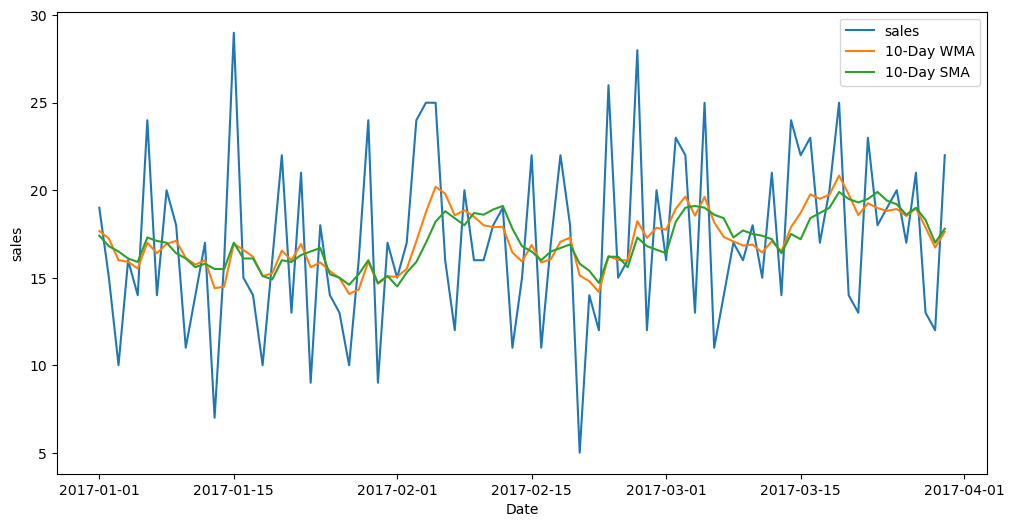

In [75]:
plt.figure(figsize = (12,6))
plt.plot(df_weighted_short_1_1['sales'], label="sales")
plt.plot(df_weighted_short_1_1['10-day-WMA'], label="10-Day WMA")
plt.plot(df_weighted_short_1_1['sma10'], label="10-Day SMA")
plt.xlabel("Date")
plt.ylabel("sales")
plt.legend()
plt.show()

# XG Boost

In [76]:
XG_model = xgb.XGBRegressor(n_estimators=1000) # Works


In [77]:
X_test = X_test.drop (['ItemStoreCombined'],axis=1)
X_train = X_train.drop (['ItemStoreCombined'],axis=1)

In [78]:
X_test.head()

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,
2017-01-01,1,1,6,1,1,2017,1,1,52
2017-01-02,1,1,0,1,1,2017,2,2,1
2017-01-03,1,1,1,1,1,2017,3,3,1
2017-01-04,1,1,2,1,1,2017,4,4,1
2017-01-05,1,1,3,1,1,2017,5,5,1


In [79]:
y_test.head()

date
2017-01-01    19
2017-01-02    15
2017-01-03    10
2017-01-04    16
2017-01-05    14
Name: sales, dtype: int64

In [80]:
y_test.sum()

10733740

In [81]:
%%time
XG_model.fit(X_train, y_train,eval_set=[(X_test, y_test)],early_stopping_rounds=50,verbose=False)


C:\Users\sasha\anaconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


CPU times: total: 12min 9s
Wall time: 3min 7s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

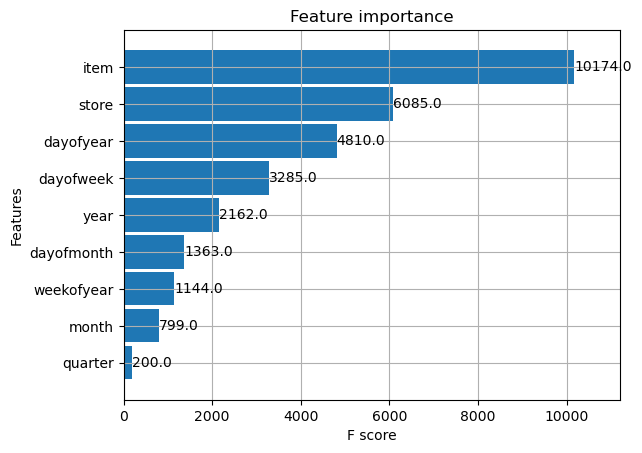

In [82]:
_ = plot_importance(XG_model, height=0.9)

In [83]:
XG_test_prediction = XG_model.predict(X_test)

In [84]:
XG_test_all =X_test.copy()
XG_train_all =X_train.copy()
XG_test_all['XG prediction'] = XG_model.predict(X_test)
XG_train_all['XG prediction'] =XG_model.predict(X_train)
XG_test_all['sales'] = y_test
XG_train_all['sales'] = y_train
df_xg_all = pd.concat([XG_test_all, XG_train_all], sort=False)

In [85]:
RMSE_XG_initial  = np.mean(np.sqrt((XG_test_all['XG prediction'] - XG_test_all['sales']) ** 2)) 
print(RMSE_XG_initial)

6.313282459342643


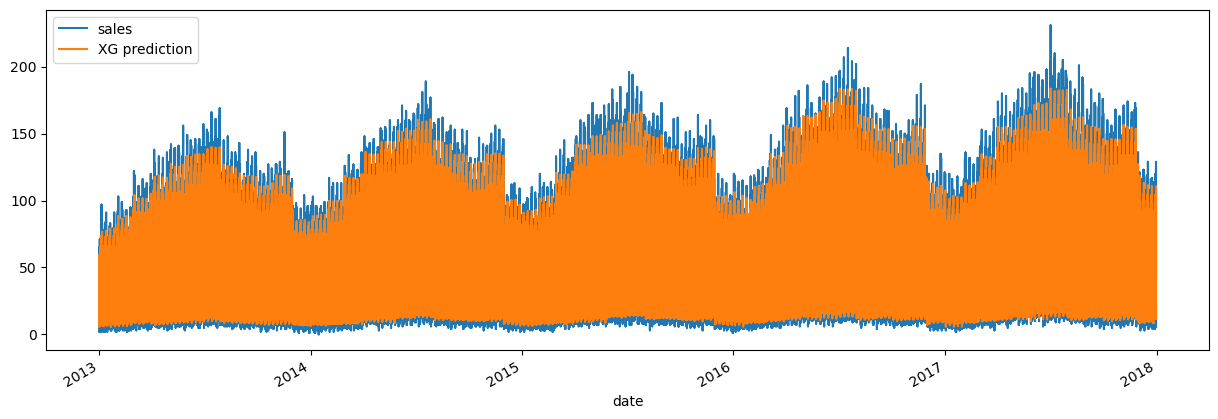

In [86]:
_ = df_xg_all[['sales','XG prediction']].plot(figsize=(15, 5))
# too many stores and products for graph to be useful apart form seeing the outliers
# when see the blue this is the outliers
# there are very few super low sales days
# there are plenty of days that are very high - which are good for business but hard to forecast

In [87]:
df_xg_all.sample(5)

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XG prediction,sales
date,,,,,,,,,,,
2016-08-01,8,36,0,3,8,2016,214,1,31,92.506508,83
2014-05-31,9,36,5,2,5,2014,151,31,22,102.957199,81
2017-01-11,1,14,2,1,1,2017,11,11,2,36.026566,33
2013-08-24,5,37,5,3,8,2013,236,24,34,21.963079,16
2013-03-01,1,20,4,1,3,2013,60,1,9,33.891869,31


In [88]:
XG_test_all.head()

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XG prediction,sales
date,,,,,,,,,,,
2017-01-01,1,1,6,1,1,2017,1,1,52,17.318481,19
2017-01-02,1,1,0,1,1,2017,2,2,1,12.165764,15
2017-01-03,1,1,1,1,1,2017,3,3,1,13.705684,10
2017-01-04,1,1,2,1,1,2017,4,4,1,13.153199,16
2017-01-05,1,1,3,1,1,2017,5,5,1,15.693305,14


In [89]:
#XG_test_all['sales']

In [90]:
#XG_test_all['XG prediction']

In [91]:
XG_test_all.head()

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XG prediction,sales
date,,,,,,,,,,,
2017-01-01,1,1,6,1,1,2017,1,1,52,17.318481,19
2017-01-02,1,1,0,1,1,2017,2,2,1,12.165764,15
2017-01-03,1,1,1,1,1,2017,3,3,1,13.705684,10
2017-01-04,1,1,2,1,1,2017,4,4,1,13.153199,16
2017-01-05,1,1,3,1,1,2017,5,5,1,15.693305,14


In [92]:
df_test_all_1_1 = XG_test_all[(XG_test_all.store==1)&(XG_test_all.item==1)]

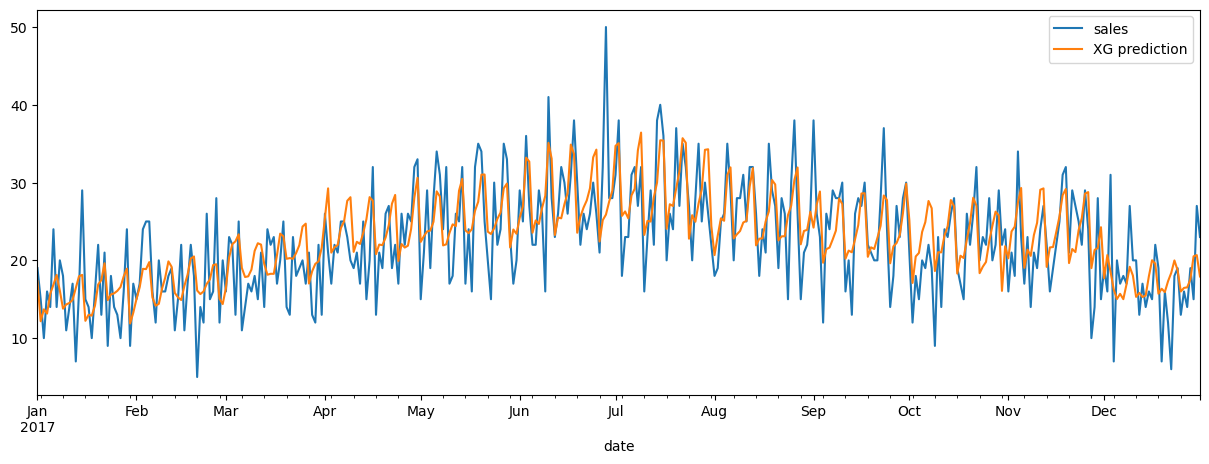

In [93]:
_ = df_test_all_1_1[['sales','XG prediction']].plot(figsize=(15, 5))

In [94]:
df_test_all_2_1 = XG_test_all[(XG_test_all.store==2)&(XG_test_all.item==1)]

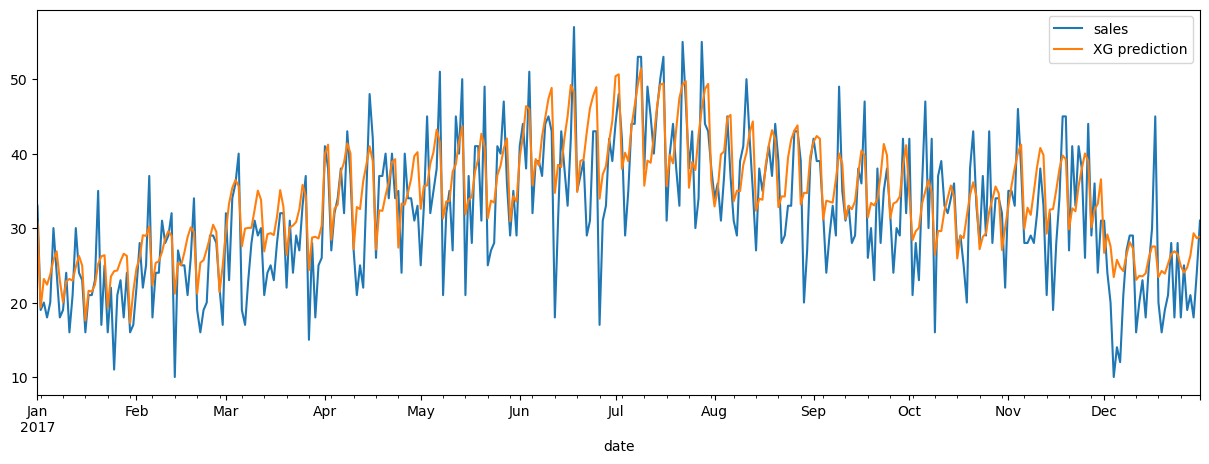

In [95]:
_ = df_test_all_2_1[['sales','XG prediction']].plot(figsize=(15, 5))

In [96]:
df_test_all_2_2 = XG_test_all[(XG_test_all.store==2)&(XG_test_all.item==2)]

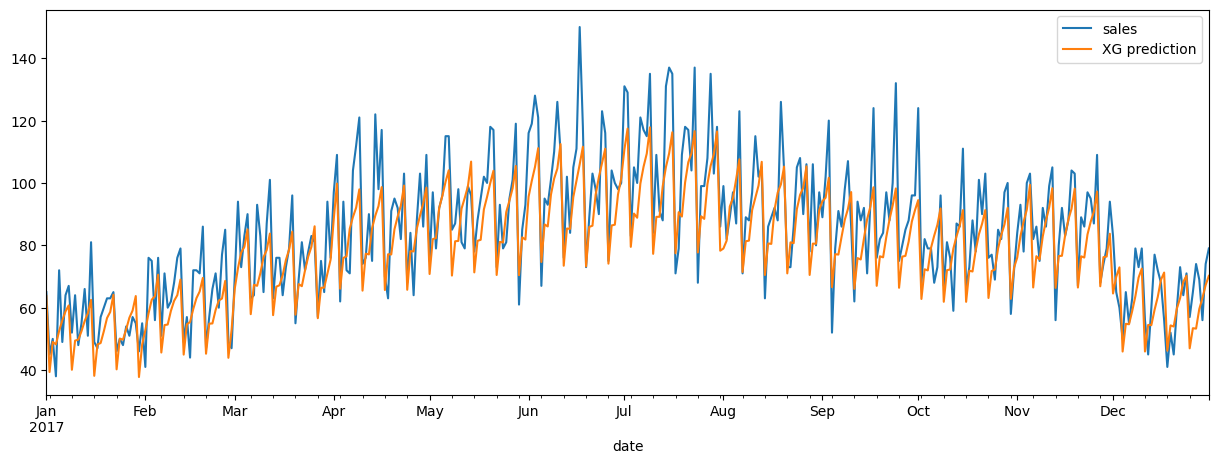

In [97]:
_ = df_test_all_2_2[['sales','XG prediction']].plot(figsize=(15, 5))

In [98]:
XG_test_all.head()

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XG prediction,sales
date,,,,,,,,,,,
2017-01-01,1,1,6,1,1,2017,1,1,52,17.318481,19
2017-01-02,1,1,0,1,1,2017,2,2,1,12.165764,15
2017-01-03,1,1,1,1,1,2017,3,3,1,13.705684,10
2017-01-04,1,1,2,1,1,2017,4,4,1,13.153199,16
2017-01-05,1,1,3,1,1,2017,5,5,1,15.693305,14


In [99]:
# This calls the error calculating function
XG_Results= calculate_error(XG_test_all['sales'],XG_train_all['sales'],XG_test_all['XG prediction'],XG_train_all['XG prediction'])

In [100]:
print(XG_Results)

{'MSE_test': 68.19063612478597, 'MSE_train': 50.354376559764056, 'MAE_test': 6.313282459342643, 'MAE_train': 5.470699013581517, 'MAPE': 68.19063612478597, 'RMSE': 6.313282459342643}


In [101]:
print(color.BOLD +"XG Boost Results ")
print ('\033[0m')

print("Mean Squared Error -MSE")
print("MSE_test",XG_Results['MSE_test'])
print("MSE_train",XG_Results['MSE_train'])
print(" ")
print("Mean Absolute Error - MAE")
print("MAE_test",XG_Results['MAE_test'])
print("MAE_train",XG_Results['MAE_train'])
print(" ")
print("Mean Absolute Percentage Error - MPE")
print("MAPE",XG_Results['MAPE'])
print(" ")
print("Root Mean Squared Error -RMSE")
print("RMSE",XG_Results['RMSE'])


XG Boost Results 

Mean Squared Error -MSE
MSE_test 68.19063612478597
MSE_train 50.354376559764056
 
Mean Absolute Error - MAE
MAE_test 6.313282459342643
MAE_train 5.470699013581517
 
Mean Absolute Percentage Error - MPE
MAPE 68.19063612478597
 
Root Mean Squared Error -RMSE
RMSE 6.313282459342643


In [102]:
XGaccuracy = accuracy_score(XG_test_all['sales'], XG_test_all['XG prediction'].round()) 
print("Accuracy: %.2f%%" % (XGaccuracy * 100.0))
# This accuracy score does not relfect the accuracy of the result. Instead I looked at the forecasts. I have therefore not used accuracy score further and instead used RMSE and others/

Accuracy: 5.52%


In [103]:
XG_test_all['error'] = XG_test_all['sales'] - XG_test_all['XG prediction']
XG_test_all['abs_error'] = XG_test_all['error'].apply(np.abs)
XG_test_all['abs_error_percent'] = (XG_test_all['abs_error'] / XG_test_all['sales'])*100
error_by_day = XG_test_all.groupby(['year','month','dayofmonth']).mean()[['sales','XG prediction','error','abs_error','store','item']]

In [104]:
error_by_day.sort_values('error', ascending=True).head(5)

sales  XG prediction     error  abs_error  store  item
year month dayofmonth                                                         
2017 3     2           52.652      52.891190 -0.239190   5.677345    5.5  25.5
     1     1           47.418      47.469193 -0.051192   4.475669    5.5  25.5
     2     27          35.100      35.100025 -0.000024   4.815144    5.5  25.5
           6           35.168      35.000359  0.167643   5.030515    5.5  25.5
     3     20          41.790      41.618835  0.171166   5.325778    5.5  25.5

In [105]:
df_xg_all.head()

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XG prediction,sales
date,,,,,,,,,,,
2017-01-01,1,1,6,1,1,2017,1,1,52,17.318481,19
2017-01-02,1,1,0,1,1,2017,2,2,1,12.165764,15
2017-01-03,1,1,1,1,1,2017,3,3,1,13.705684,10
2017-01-04,1,1,2,1,1,2017,4,4,1,13.153199,16
2017-01-05,1,1,3,1,1,2017,5,5,1,15.693305,14


In [106]:
#XG_test_all['error']

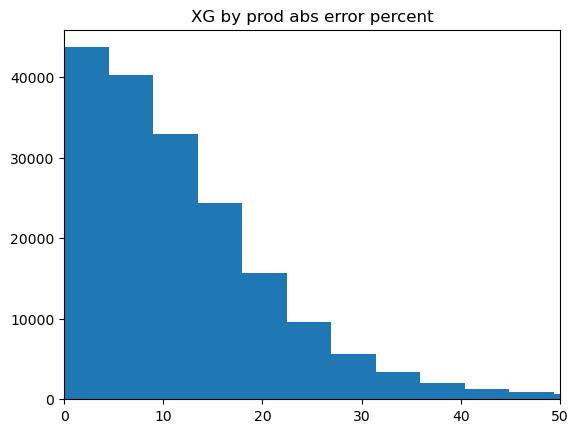

In [107]:

num_bins = 100
plt.title('XG by prod abs error percent')
plt.hist(XG_test_all['abs_error_percent'], bins =num_bins)
plt.xlim((0,50))
plt.show()


In [108]:
XG_test_all.head()

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XG prediction,sales,error,abs_error,abs_error_percent
date,,,,,,,,,,,,,,
2017-01-01,1,1,6,1,1,2017,1,1,52,17.318481,19,1.681519,1.681519,8.850098
2017-01-02,1,1,0,1,1,2017,2,2,1,12.165764,15,2.834236,2.834236,18.894908
2017-01-03,1,1,1,1,1,2017,3,3,1,13.705684,10,-3.705684,3.705684,37.056837
2017-01-04,1,1,2,1,1,2017,4,4,1,13.153199,16,2.846801,2.846801,17.792505
2017-01-05,1,1,3,1,1,2017,5,5,1,15.693305,14,-1.693305,1.693305,12.095036


In [109]:
XG_test_all.abs_error_percent.quantile([0.01,0.05,0.1,0.25,0.5,0.75,0.995])
# used this information for presentation in pack to look at the accuracy of the model

0.010     0.184210
0.050     0.921527
0.100     1.852853
0.250     4.686992
0.500     9.881809
0.750    16.986638
0.995    73.927001
Name: abs_error_percent, dtype: float64

In [110]:
df_test_final.sample(5)

,date,store,item,sales,ItemStoreCombined,dayofmonth,Mean_Amount_7D
65902,2017-07-22,1,19,51,19-1,22,52.285714
168986,2017-12-23,3,47,28,47-3,23,23.142857
137627,2017-01-23,8,38,64,38-8,23,78.571429
94504,2017-12-01,9,26,48,26-9,1,56.285714
47097,2017-01-13,10,13,89,13-10,13,74.000000


# Add XG Boost Results to final(master tab)

In [111]:
XG_test_predictions = XG_test_all.copy()

In [112]:
XG_test_predictions.head()

,store,item,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XG prediction,sales,error,abs_error,abs_error_percent
date,,,,,,,,,,,,,,
2017-01-01,1,1,6,1,1,2017,1,1,52,17.318481,19,1.681519,1.681519,8.850098
2017-01-02,1,1,0,1,1,2017,2,2,1,12.165764,15,2.834236,2.834236,18.894908
2017-01-03,1,1,1,1,1,2017,3,3,1,13.705684,10,-3.705684,3.705684,37.056837
2017-01-04,1,1,2,1,1,2017,4,4,1,13.153199,16,2.846801,2.846801,17.792505
2017-01-05,1,1,3,1,1,2017,5,5,1,15.693305,14,-1.693305,1.693305,12.095036


In [113]:
XG_test_predictions = XG_test_predictions.drop (['dayofweek', 'dayofmonth','quarter','month', 'year', 'dayofyear', 'weekofyear'],axis=1)

In [114]:
df_test_final.sum()

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\3497409492.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test_final.sum()


store                                                          1003750
item                                                           4653750
sales                                                         10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofmonth                                                     2869000
Mean_Amount_7D                                         10726328.571429
dtype: object

In [115]:
df_test_final = df_test_final.merge(XG_test_predictions, left_on=['date','store','item'], right_on=['date','store','item'] )

In [116]:
df_test_final.sample(5)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth,Mean_Amount_7D,XG prediction,sales_y,error,abs_error,abs_error_percent
165243,2017-09-21,3,46,69,46-3,21,78.428571,75.327812,69,-6.327812,6.327812,9.170742
122713,2017-03-15,7,34,21,34-7,15,17.857143,17.393118,21,3.606882,3.606882,17.175629
28349,2017-09-02,8,8,115,8-8,2,122.000000,125.199287,115,-10.199287,10.199287,8.868946
141908,2017-10-16,9,39,51,39-9,16,54.714286,39.380928,51,11.619072,11.619072,22.782494
52315,2017-05-01,4,15,107,15-4,1,110.714286,90.464592,107,16.535408,16.535408,15.453652


# Cat Boost

In [117]:
#CatBoostModel=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
CatBoostModel=CatBoostRegressor()

In [118]:
CatBoostModel.fit(X_train, y_train,eval_set=(X_test, y_test),plot=True,silent = True) #verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [119]:
catboostpred = CatBoostModel.predict(X_test)

In [120]:
print(catboostpred)

[17.97313955 11.89388501 14.40869421 ... 65.15749736 69.52326124
 71.50673138]


In [121]:
CAT_test_all =X_test.copy()
CAT_train_all =X_train.copy()
CAT_test_all['CAT prediction'] = CatBoostModel.predict(X_test)
CAT_train_all['CAT prediction'] =CatBoostModel.predict(X_train)
CAT_test_all['sales'] = y_test
CAT_train_all['sales'] = y_train
df_CAT_all = pd.concat([CAT_test_all, CAT_train_all], sort=False)


In [122]:
CAT_test_all.sum()

store             1.003750e+06
item              4.653750e+06
dayofweek         5.490000e+05
quarter           4.580000e+05
month             1.191000e+06
year              3.681025e+08
dayofyear         3.339750e+07
dayofmonth        2.869000e+06
weekofyear        4.849000e+06
CAT prediction    1.035361e+07
sales             1.073374e+07
dtype: float64

In [123]:
df_test_all_1_1 = CAT_test_all[(CAT_test_all.store==1)&(CAT_test_all.item==1)]


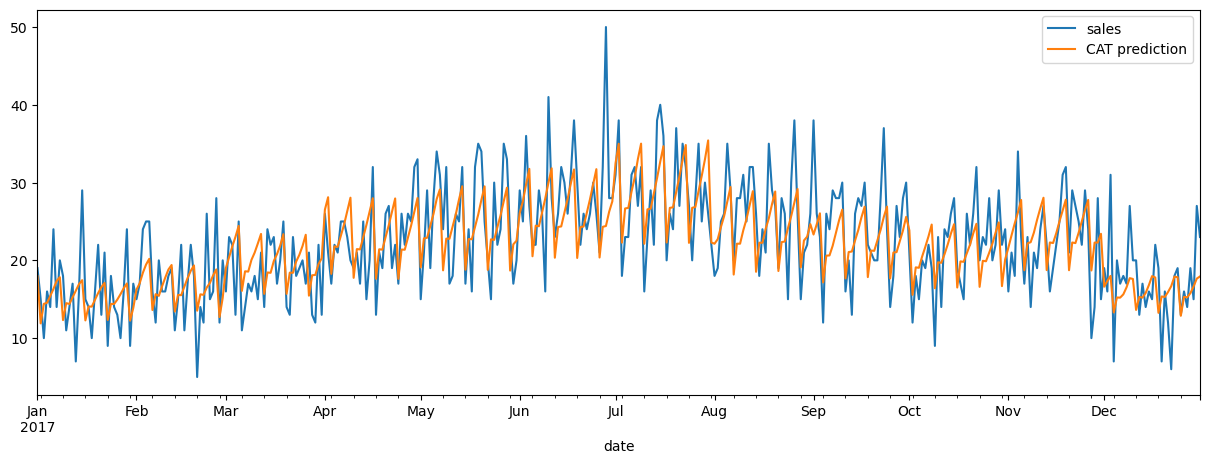

In [124]:
_=df_test_all_1_1[['sales','CAT prediction']].plot(figsize=(15, 5))

In [125]:
CAT_Results= calculate_error(CAT_test_all['sales'],CAT_train_all['sales'],CAT_test_all['CAT prediction'],CAT_train_all['CAT prediction'])

In [126]:
print(color.BOLD +"CAT Boost Results ")
print ('\033[0m')

print("Mean Squared Error -MSE")
print("MSE_test",CAT_Results['MSE_test'])
print("MSE_train",CAT_Results['MSE_train'])
print(" ")
print("Mean Absolute Error - MAE")
print("MAE_test",CAT_Results['MAE_test'])
print("MAE_train",CAT_Results['MAE_train'])
print(" ")
print("Mean Absolute Percentage Error - MPE")
print("MAPE",CAT_Results['MAPE'])
print(" ")
print("Root Mean Squared Error -RMSE")
print("RMSE",CAT_Results['RMSE'])

CAT Boost Results 

Mean Squared Error -MSE
MSE_test 70.63478665628836
MSE_train 53.020414857445935
 
Mean Absolute Error - MAE
MAE_test 6.3562880491751015
MAE_train 5.60433665512337
 
Mean Absolute Percentage Error - MPE
MAPE 70.63478665628836
 
Root Mean Squared Error -RMSE
RMSE 6.3562880491751015


In [127]:
df_test_final = df_test_final.merge(CAT_test_all, left_on=['date','store','item'], right_on=['date','store','item'] )

In [128]:
df_test_final.head()

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,abs_error_percent,dayofweek,quarter,month,year,dayofyear,dayofmonth_y,weekofyear,CAT prediction,sales
0,2017-01-01,1,1,19,1-1,1,17.142857,17.318481,19,1.681519,...,8.850098,6,1,1,2017,1,1,52,17.973140,19
1,2017-01-02,1,1,15,1-1,2,17.000000,12.165764,15,2.834236,...,18.894908,0,1,1,2017,2,2,1,11.893885,15
2,2017-01-03,1,1,10,1-1,3,17.000000,13.705684,10,-3.705684,...,37.056837,1,1,1,2017,3,3,1,14.408694,10
3,2017-01-04,1,1,16,1-1,4,17.000000,13.153199,16,2.846801,...,17.792505,2,1,1,2017,4,4,1,14.549075,16
4,2017-01-05,1,1,14,1-1,5,16.000000,15.693305,14,-1.693305,...,12.095036,3,1,1,2017,5,5,1,15.408377,14


# Deep AR - 365 Days
This an some other models were run using Amazon Forecast. The process was
* Add train data to Amazon
* Run forecast in Amazon
* Export the forecast to Amazon S3
* It was 1 forecast (appox 182K rows) but Amazon produced it as approx 25 files
* Then in Amazon sagemaker I collated the files and then exported to S3 as just 1 file
* Now here I am uploading the files
* Then adding to the main Foreecast tracking sheet
* Then calculating the accuracy using RMSE and other options
* Printing all the results together


In [129]:
DeepAR = pd.read_csv(r'C:/Users/sasha/Alex_Python_Folder/Sept 23 -Capstone Time Series By Alex Dance - Final/Capstone Data/Back From Amazon/DeepAR3.csv')

In [130]:
DeepAR.head()

,item_id,date,store_id,p10,p50,p90
0,36,2017-01-01T00:00:00Z,2,84.764282,95.937477,109.807701
1,36,2017-01-02T00:00:00Z,2,51.847923,64.234650,74.925110
2,36,2017-01-03T00:00:00Z,2,64.429222,76.217873,87.928719
3,36,2017-01-04T00:00:00Z,2,64.200394,75.285362,84.700272
4,36,2017-01-05T00:00:00Z,2,65.510262,77.181885,88.940048


In [131]:
DeepAR = DeepAR.replace(to_replace='T00:00:00Z', value='', regex=True)

In [132]:
DeepAR = DeepAR.rename(columns={'p10': 'DeepAR p10','p50': 'DeepAR p50','p90': 'DeepAR p90','store_id': 'store','item_id': 'item'  })

In [133]:
DeepAR['date'] =  pd.to_datetime(DeepAR['date'])

In [134]:
DeepAR.head()

,item,date,store,DeepAR p10,DeepAR p50,DeepAR p90
0,36,2017-01-01,2,84.764282,95.937477,109.807701
1,36,2017-01-02,2,51.847923,64.234650,74.925110
2,36,2017-01-03,2,64.429222,76.217873,87.928719
3,36,2017-01-04,2,64.200394,75.285362,84.700272
4,36,2017-01-05,2,65.510262,77.181885,88.940048


In [135]:
df_test_final = df_test_final.merge(DeepAR, left_on=['date','store','item'], right_on=['date','store','item'] )

In [136]:
df_test_final.sample(5)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,month,year,dayofyear,dayofmonth_y,weekofyear,CAT prediction,sales,DeepAR p10,DeepAR p50,DeepAR p90
112892,2017-04-18,10,31,64,31-10,18,73.142857,71.471863,64,-7.471863,...,4,2017,108,18,16,69.581273,64,61.961887,76.179619,87.280922
92897,2017-07-07,5,26,47,26-5,7,53.000000,53.780560,47,-6.780560,...,7,2017,188,7,27,53.312663,47,47.247253,57.120865,66.119766
122136,2017-08-15,5,34,25,34-5,15,22.857143,21.055260,25,3.944740,...,8,2017,227,15,33,21.458075,25,19.181719,25.095053,30.839018
170384,2017-10-22,7,47,20,47-7,22,15.857143,18.268427,20,1.731573,...,10,2017,295,22,42,16.243965,20,16.095964,20.891462,26.477474
33104,2017-09-12,1,10,81,10-1,12,83.000000,70.374336,81,10.625664,...,9,2017,255,12,37,70.082414,81,67.677963,76.851517,88.599854


In [137]:
DeepAR = DeepAR.set_index('date')

In [138]:
DeepAR_test_all = DeepAR [split :]

In [139]:
DeepAR_train_all = DeepAR [ :split]

In [140]:
DeepAR_test_all.head()

,item,store,DeepAR p10,DeepAR p50,DeepAR p90
date,,,,,
2017-01-01,36,2,84.764282,95.937477,109.807701
2017-01-02,36,2,51.847923,64.234650,74.925110
2017-01-03,36,2,64.429222,76.217873,87.928719
2017-01-04,36,2,64.200394,75.285362,84.700272
2017-01-05,36,2,65.510262,77.181885,88.940048


In [141]:
DeepAR_train_all.head()

,item,store,DeepAR p10,DeepAR p50,DeepAR p90
date,,,,,
2017-01-01,36,2,84.764282,95.937477,109.807701
2017-01-01,44,8,27.121500,33.279018,41.295391
2017-01-01,39,10,37.892647,45.340363,55.106323
2017-01-01,5,1,10.796619,16.344246,20.261379
2017-01-01,16,8,23.587189,29.581112,37.055595


In [142]:
#DeepAR_test_all['DeepAR p50'] 

In [143]:
DeepAR_Results= calculate_errorb(df_test_final['sales_x'],df_test_final['DeepAR p50'])

In [144]:
print(color.BOLD +"DeepAR Results ")
print ('\033[0m')

print("Mean Squared Error -MSE")
print("MSE_test",DeepAR_Results['MSE_test'])
#print("MSE_train",DeepAR_Results['MSE_train'])
print(" ")
print("Mean Absolute Error - MAE")
print("MAE_test",DeepAR_Results['MAE_test'])
#print("MAE_train",DeepAR_Results['MAE_train'])
print(" ")
print("Mean Absolute Percentage Error - MPE")
print("MAPE",DeepAR_Results['MAPE'])
print(" ")
print("Root Mean Squared Error -RMSE")
print("RMSE",DeepAR_Results['RMSE'])


DeepAR Results 

Mean Squared Error -MSE
MSE_test 70.85265737630033
 
Mean Absolute Error - MAE
MAE_test 6.503165773412589
 
Mean Absolute Percentage Error - MPE
MAPE 70.85265737630033
 
Root Mean Squared Error -RMSE
RMSE 6.503165773412589


In [145]:
df_test_final.sample(5)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,month,year,dayofyear,dayofmonth_y,weekofyear,CAT prediction,sales,DeepAR p10,DeepAR p50,DeepAR p90
46680,2017-11-22,8,13,120,13-8,22,124.142857,107.879486,120,12.120514,...,11,2017,326,22,47,105.706302,120,107.161812,121.853523,136.003632
180839,2017-06-14,6,50,65,50-6,14,71.285714,63.681049,65,1.318951,...,6,2017,165,14,24,62.455234,65,55.481735,65.740578,78.263962
4838,2017-04-04,4,2,64,2-4,4,67.142857,67.074730,64,-3.074730,...,4,2017,94,4,14,62.230012,64,56.996532,71.683914,81.601967
59984,2017-05-05,5,17,35,17-5,5,29.000000,33.238323,35,1.761677,...,5,2017,125,5,18,31.600579,35,29.346138,35.427673,41.601536
11774,2017-04-05,3,4,24,4-3,5,31.428571,31.624376,24,-7.624376,...,4,2017,95,5,14,26.637779,24,21.023228,28.431309,34.404713


# Prophet - 365 Days

In [146]:
Prophet = pd.read_csv(r'C:/Users/sasha/Alex_Python_Folder/Sept 23 -Capstone Time Series By Alex Dance - Final/Capstone Data/Back From Amazon/Prophet2.csv')

In [147]:
Prophet.head(10)

,item_id,date,store_id,p10,p50,p90
0,47,2017-01-01T00:00:00Z,3,19.330191,25.191065,30.513657
1,47,2017-01-02T00:00:00Z,3,7.760203,15.420742,19.584054
2,47,2017-01-03T00:00:00Z,3,11.782807,18.574037,24.665435
3,47,2017-01-04T00:00:00Z,3,12.456302,19.199878,26.254035
4,47,2017-01-05T00:00:00Z,3,14.482469,20.452598,27.876129
5,47,2017-01-06T00:00:00Z,3,14.917645,21.120764,27.238577
6,47,2017-01-07T00:00:00Z,3,19.115302,25.396307,31.417771
7,47,2017-01-08T00:00:00Z,3,20.168148,25.559684,30.819291
8,47,2017-01-09T00:00:00Z,3,9.467580,14.973982,19.499602
9,47,2017-01-10T00:00:00Z,3,12.290613,19.536579,25.663957


In [148]:
Prophet = Prophet.replace(to_replace='T00:00:00Z', value='', regex=True)

In [149]:
Prophet = Prophet.rename(columns={'p10': 'Prophet p10','p50': 'Prophet p50','p90': 'Prophet p90','store_id': 'store','item_id': 'item'  })

In [150]:
Prophet.head()

,item,date,store,Prophet p10,Prophet p50,Prophet p90
0,47,2017-01-01,3,19.330191,25.191065,30.513657
1,47,2017-01-02,3,7.760203,15.420742,19.584054
2,47,2017-01-03,3,11.782807,18.574037,24.665435
3,47,2017-01-04,3,12.456302,19.199878,26.254035
4,47,2017-01-05,3,14.482469,20.452598,27.876129


In [151]:
Prophet['date'] =  pd.to_datetime(Prophet['date'])

In [152]:
df_test_final = df_test_final.merge(Prophet, left_on=['date','store','item'], right_on=['date','store','item'] )

In [153]:
df_test_final.sum()

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\3497409492.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test_final.sum()


store                                                          1003750
item                                                           4653750
sales_x                                                       10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofmonth_x                                                   2869000
Mean_Amount_7D                                         10726328.571429
XG prediction                                               10396203.0
sales_y                                                       10733740
error                                                    337538.531189
abs_error                                                1152174.04883
abs_error_percent                                       2315121.596477
dayofweek                                                       549000
quarter                                                         458000
month                                                          1191000
year  

In [154]:
Prophet = Prophet.set_index('date')

In [155]:
Prophet_test_all = Prophet [split :]
Prophet_train_all = Prophet [ :split]

In [156]:
y_test.head()

date
2017-01-01    19
2017-01-02    15
2017-01-03    10
2017-01-04    16
2017-01-05    14
Name: sales, dtype: int64

In [157]:
y_test.sum()

10733740

In [158]:
Prophet_Results= calculate_errorb(df_test_final['sales_x'],df_test_final['Prophet p50'])

In [159]:
print(color.BOLD +"Prophet Results ")
print ('\033[0m')

print("Mean Squared Error -MSE")
print("MSE_test",Prophet_Results['MSE_test'])
#print("MSE_train",Prophet_Results['MSE_train'])
print(" ")
print("Mean Absolute Error - MAE")
print("MAE_test",Prophet_Results['MAE_test'])
#print("MAE_train",Prophet_Results['MAE_train'])
print(" ")
print("Mean Absolute Percentage Error - MPE")
print("MAPE",Prophet_Results['MAPE'])
print(" ")
print("Root Mean Squared Error -RMSE")
print("RMSE",Prophet_Results['RMSE'])


Prophet Results 

Mean Squared Error -MSE
MSE_test 78.8228684488689
 
Mean Absolute Error - MAE
MAE_test 6.855061314747113
 
Mean Absolute Percentage Error - MPE
MAPE 78.8228684488689
 
Root Mean Squared Error -RMSE
RMSE 6.855061314747113


# Auto 365

In [160]:
Auto = pd.read_csv(r'C:/Users/sasha/Alex_Python_Folder/Sept 23 -Capstone Time Series By Alex Dance - Final/Capstone Data/Back From Amazon/Autov1.csv')

In [161]:
Auto = Auto.replace(to_replace='T00:00:00Z', value='', regex=True)

In [162]:
Auto = Auto.rename(columns={'p10': 'Auto p10','p50': 'Auto p50','p90': 'Auto p90','store_id': 'store','item_id': 'item'  })

In [163]:
Auto['date'] =  pd.to_datetime(Auto['date'])

In [164]:
df_test_final_Auto = df_test_final.copy()

In [165]:
df_test_final_Auto = df_test_final_Auto.merge(Auto, left_on=['date','store','item'], right_on=['date','store','item'] )

In [166]:
Auto = Auto.set_index('date')

In [167]:
df_test_final_Auto.sample(20)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,Auto p10,Auto p50,Auto p90
348,2017-12-15,1,1,16,1-1,15,18.142857,17.954645,16,-1.954645,...,16,13.233248,18.237499,23.299364,12.379614,18.331738,23.923713,185.669551,212.469916,239.690983
10389,2017-06-19,1,29,74,29-1,19,87.428571,66.372604,74,7.627396,...,74,62.554188,69.548119,82.381203,60.776870,70.426688,80.518113,778.792321,832.461877,875.344718
2775,2017-08-09,1,8,82,8-1,9,88.000000,76.942955,82,5.057045,...,82,71.154556,85.804489,97.091225,74.256699,86.065418,96.541797,893.462278,955.419213,1006.135653
4718,2017-12-05,1,13,65,13-1,5,72.857143,59.531143,65,5.468857,...,65,48.996735,62.584965,72.801147,60.066923,71.327684,80.511647,707.486280,774.504198,842.177321
7179,2017-09-02,1,20,63,20-1,2,49.857143,55.208374,63,7.791626,...,63,50.027443,61.800014,74.996803,53.665436,60.692233,67.769920,630.395087,659.187783,702.175761
14682,2017-03-24,1,41,19,41-1,24,17.714286,24.913095,19,-5.913095,...,19,18.055653,24.366884,29.219065,18.834419,23.468494,29.026212,239.414883,263.128955,276.498454
12087,2017-02-12,1,34,19,34-1,12,18.571429,23.253691,19,-4.253691,...,19,18.956612,24.886074,31.422792,19.216440,25.387222,31.143569,254.235319,283.593643,305.321069
9454,2017-11-26,1,26,53,26-1,26,48.285714,59.893837,53,-6.893837,...,53,47.029472,57.448383,66.371841,51.470366,59.802225,70.035616,596.339439,636.523585,681.310846
10944,2017-12-26,1,30,27,30-1,26,29.571429,27.281025,27,-0.281025,...,27,22.722355,29.725071,35.225258,23.793886,30.902735,39.429955,304.724453,353.072693,386.349275
15418,2017-03-30,1,43,53,43-1,30,50.000000,45.605465,53,7.394535,...,53,37.691990,49.003242,58.566307,41.458052,49.855896,57.806923,539.766664,579.322188,614.440620


In [168]:
Auto.sum()/1000

item          465.375000
store          18.250000
Auto p10    10420.428843
Auto p50    11178.879246
Auto p90    11928.261589
dtype: float64

In [169]:
#df_test_final_Auto

In [170]:
df_test_final.sum()

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\3497409492.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test_final.sum()


store                                                          1003750
item                                                           4653750
sales_x                                                       10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofmonth_x                                                   2869000
Mean_Amount_7D                                         10726328.571429
XG prediction                                               10396203.0
sales_y                                                       10733740
error                                                    337538.531189
abs_error                                                1152174.04883
abs_error_percent                                       2315121.596477
dayofweek                                                       549000
quarter                                                         458000
month                                                          1191000
year  

In [171]:
Auto_test_all = Auto [split :]
Auto_train_all = Auto [ :split]

In [172]:
Auto_Results= calculate_errorb(df_test_final_Auto['sales_x'],df_test_final_Auto['Auto p50'])

In [173]:
print(color.BOLD +"Auto Results ")
print ('\033[0m')

print("Mean Squared Error -MSE")
print("MSE_test",Auto_Results['MSE_test'])
#print("MSE_train",Auto_Results['MSE_train'])
print(" ")
print("Mean Absolute Error - MAE")
print("MAE_test",Auto_Results['MAE_test'])
#print("MAE_train",Auto_Results['MAE_train'])
print(" ")
print("Mean Absolute Percentage Error - MPE")
print("MAPE",Auto_Results['MAPE'])
print(" ")
print("Root Mean Squared Error -RMSE")
print("RMSE",Auto_Results['RMSE'])


Auto Results 

Mean Squared Error -MSE
MSE_test 377276.1570092058
 
Mean Absolute Error - MAE
MAE_test 559.2934381591892
 
Mean Absolute Percentage Error - MPE
MAPE 377276.1570092058
 
Root Mean Squared Error -RMSE
RMSE 559.2934381591892


In [174]:
Auto.head()

,item,store,Auto p10,Auto p50,Auto p90
date,,,,,
2017-01-01,28,1,853.152328,900.173306,969.571037
2017-01-02,28,1,504.430799,565.123164,608.777676
2017-01-03,28,1,631.264940,672.703057,738.241125
2017-01-04,28,1,616.035761,677.061186,743.771155
2017-01-05,28,1,673.109789,736.258886,799.029878


In [175]:
df_test_final.head()

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,dayofmonth_y,weekofyear,CAT prediction,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90
0,2017-01-01,1,1,19,1-1,1,17.142857,17.318481,19,1.681519,...,1,52,17.973140,19,13.092031,18.273352,23.108099,14.481007,21.839976,26.572280
1,2017-01-02,1,1,15,1-1,2,17.000000,12.165764,15,2.834236,...,2,1,11.893885,15,6.443378,12.557931,17.589214,8.835672,12.791130,17.247647
2,2017-01-03,1,1,10,1-1,3,17.000000,13.705684,10,-3.705684,...,3,1,14.408694,10,10.678741,13.940229,18.678812,9.756908,15.349970,20.506746
3,2017-01-04,1,1,16,1-1,4,17.000000,13.153199,16,2.846801,...,4,1,14.549075,16,9.747601,15.168463,21.893089,10.321535,17.171180,23.340119
4,2017-01-05,1,1,14,1-1,5,16.000000,15.693305,14,-1.693305,...,5,1,15.408377,14,11.181156,15.107273,20.859018,10.991293,16.469481,21.002746


In [176]:
df_test_final.sum()

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\3497409492.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test_final.sum()


store                                                          1003750
item                                                           4653750
sales_x                                                       10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofmonth_x                                                   2869000
Mean_Amount_7D                                         10726328.571429
XG prediction                                               10396203.0
sales_y                                                       10733740
error                                                    337538.531189
abs_error                                                1152174.04883
abs_error_percent                                       2315121.596477
dayofweek                                                       549000
quarter                                                         458000
month                                                          1191000
year  

# ARIMA from Amazon

In [177]:
arima1 = pd.read_csv(r'C:/Users/sasha/Alex_Python_Folder/Sept 23 -Capstone Time Series By Alex Dance - Final/Capstone Data/Back From Amazon/ARIMA1.csv')

In [178]:
arima1 = arima1.replace(to_replace='T00:00:00Z', value='', regex=True)

In [179]:
arima1 = arima1.rename(columns={'p10': 'ARIMA p10','p50': 'ARIMA p50','p90': 'ARIMA p90','store_id': 'store','item_id': 'item'  })

In [180]:
arima1['date'] =  pd.to_datetime(arima1['date'])

In [181]:
arima1 = arima1.set_index('date')

In [182]:
arima1.head()

,item,store,ARIMA p10,ARIMA p50,ARIMA p90
date,,,,,
2017-01-01,7,7,34.652203,43.505269,52.358335
2017-01-02,7,7,16.755004,25.690723,34.626443
2017-01-03,7,7,22.135300,31.152916,40.170531
2017-01-04,7,7,21.991041,31.089816,40.188590
2017-01-05,7,7,24.424000,33.603216,42.782431


In [183]:
arima1_test_all = arima1 [split :]
arima1_train_all = arima1 [ :split]

In [184]:
df_test_final.head()

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,dayofmonth_y,weekofyear,CAT prediction,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90
0,2017-01-01,1,1,19,1-1,1,17.142857,17.318481,19,1.681519,...,1,52,17.973140,19,13.092031,18.273352,23.108099,14.481007,21.839976,26.572280
1,2017-01-02,1,1,15,1-1,2,17.000000,12.165764,15,2.834236,...,2,1,11.893885,15,6.443378,12.557931,17.589214,8.835672,12.791130,17.247647
2,2017-01-03,1,1,10,1-1,3,17.000000,13.705684,10,-3.705684,...,3,1,14.408694,10,10.678741,13.940229,18.678812,9.756908,15.349970,20.506746
3,2017-01-04,1,1,16,1-1,4,17.000000,13.153199,16,2.846801,...,4,1,14.549075,16,9.747601,15.168463,21.893089,10.321535,17.171180,23.340119
4,2017-01-05,1,1,14,1-1,5,16.000000,15.693305,14,-1.693305,...,5,1,15.408377,14,11.181156,15.107273,20.859018,10.991293,16.469481,21.002746


In [185]:
df_test_final = df_test_final.merge(arima1, left_on=['date','store','item'], right_on=['date','store','item'] )
df_test_final_Auto = df_test_final_Auto.merge(arima1, left_on=['date','store','item'], right_on=['date','store','item'] )

In [186]:
ARIMA_Results= calculate_errorb(df_test_final['sales_x'],df_test_final['ARIMA p50'])

In [187]:
print(color.BOLD +"ARIMA Results ")
print ('\033[0m')

print("Mean Squared Error -MSE")
print("MSE_test",ARIMA_Results['MSE_test'])
#print("MSE_train",Auto_Results['MSE_train'])
print(" ")
print("Mean Absolute Error - MAE")
print("MAE_test",ARIMA_Results['MAE_test'])
#print("MAE_train",Auto_Results['MAE_train'])
print(" ")
print("Mean Absolute Percentage Error - MPE")
print("MAPE",ARIMA_Results['MAPE'])
print(" ")
print("Root Mean Squared Error -RMSE")
print("RMSE",ARIMA_Results['RMSE'])

ARIMA Results 

Mean Squared Error -MSE
MSE_test 532.5573393500791
 
Mean Absolute Error - MAE
MAE_test 17.779052079414143
 
Mean Absolute Percentage Error - MPE
MAPE 532.5573393500791
 
Root Mean Squared Error -RMSE
RMSE 17.779052079414143


# Final Compare

In [188]:
df_test_final.sum()

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\3497409492.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test_final.sum()


store                                                          1003750
item                                                           4653750
sales_x                                                       10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofmonth_x                                                   2869000
Mean_Amount_7D                                         10726328.571429
XG prediction                                               10396203.0
sales_y                                                       10733740
error                                                    337538.531189
abs_error                                                1152174.04883
abs_error_percent                                       2315121.596477
dayofweek                                                       549000
quarter                                                         458000
month                                                          1191000
year  

In [189]:
df_test_final.sample(5)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
61639,2017-11-16,9,17,40,17-9,16,36.857143,40.470184,40,-0.470184,...,40,35.365417,43.416283,49.939430,35.271445,41.996161,50.611211,9.843266,30.442421,51.041577
165124,2017-05-25,3,46,96,46-3,25,88.857143,79.083252,96,16.916748,...,96,74.413177,86.975739,100.539009,71.875281,82.315110,94.138752,23.898360,52.459449,81.020538
96729,2017-01-05,6,27,13,27-6,5,13.142857,11.071023,13,1.928977,...,13,8.663534,12.740511,17.612549,8.086090,13.982256,19.041233,6.560104,12.191932,17.823761
139609,2017-06-29,3,39,68,39-3,29,63.285714,64.190994,68,3.809006,...,68,61.039246,73.322128,83.747559,58.288258,68.541672,76.913030,16.559403,39.448520,62.337637
163973,2017-03-30,10,45,87,45-10,30,92.142857,90.103531,87,-3.103531,...,87,84.087898,96.744720,109.016533,87.116747,101.191705,113.865379,41.184820,69.753915,98.323010


In [190]:
df_test_final_Auto.head()

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,Auto p10,Auto p50,Auto p90,ARIMA p10,ARIMA p50,ARIMA p90
0,2017-01-01,1,1,19,1-1,1,17.142857,17.318481,19,1.681519,...,23.108099,14.481007,21.839976,26.572280,207.750214,225.643222,252.051311,15.038474,21.083323,27.128171
1,2017-01-02,1,1,15,1-1,2,17.000000,12.165764,15,2.834236,...,17.589214,8.835672,12.791130,17.247647,120.733112,143.828526,160.440485,6.287601,12.369299,18.450996
2,2017-01-03,1,1,10,1-1,3,17.000000,13.705684,10,-3.705684,...,18.678812,9.756908,15.349970,20.506746,152.732795,168.501343,193.440705,9.281922,15.400247,21.518572
3,2017-01-04,1,1,16,1-1,4,17.000000,13.153199,16,2.846801,...,21.893089,10.321535,17.171180,23.340119,146.613008,169.835163,195.220471,9.338442,15.493176,21.647910
4,2017-01-05,1,1,14,1-1,5,16.000000,15.693305,14,-1.693305,...,20.859018,10.991293,16.469481,21.002746,158.520001,182.550282,206.436682,9.825613,16.016542,22.207471


In [191]:
df_test_final_Auto = df_test_final_Auto.rename(columns={"sales_x": "sales", "XG prediction": "XG boost", "DeepAR p50": "DeepAR", "Prophet p50": "Prophet", "ARIMA p50": "Amazon ARIMA","Auto p50": "Amazon Auto"}, errors="raise")

In [192]:
df_test_final_1_1= df_test_final[(df_test_final.store==1) & (df_test_final.item==1)]

#df_test_final_1_1= df_test_final_Auto[(df_test_final_Auto.store==1) & (df_test_final_Auto.item==1)]
df_test_final_1_1_Jan = df_test_final_1_1[(df_test_final.date<'2017-01-31')]


C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\346313778.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_final_1_1_Jan = df_test_final_1_1[(df_test_final.date<'2017-01-31')]


In [193]:
df_test_final_1_1.sample(3)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
249,2017-09-07,1,1,29,1-1,7,25.428571,22.685753,29,6.314247,...,29,19.056488,28.392025,33.192932,20.125006,24.691975,30.255774,3.858983,16.016542,28.174100
295,2017-10-23,1,1,20,1-1,23,22.571429,18.352776,20,1.647224,...,20,14.137527,18.998718,24.547302,13.541139,19.608199,24.130796,-0.606116,12.369299,25.344714
209,2017-07-29,1,1,30,1-1,29,28.142857,34.212822,30,-4.212822,...,30,24.292141,31.811108,38.856506,25.383660,30.679835,35.993138,8.470604,19.869383,31.268163


In [194]:
RMSE_1_1_XG  = np.mean(np.sqrt((df_test_final_1_1['XG prediction'] - df_test_final_1_1['sales']) ** 2)) 
print(RMSE_1_1_XG)

4.009181701973693


In [195]:
df_test_final_1_1_NovDec = df_test_final_1_1[(df_test_final.date>'2017-10-31')]

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\3875426036.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_final_1_1_NovDec = df_test_final_1_1[(df_test_final.date>'2017-10-31')]


In [196]:
df_test_final_1_1_Jan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               30 non-null     datetime64[ns]
 1   store              30 non-null     int64         
 2   item               30 non-null     int64         
 3   sales_x            30 non-null     int64         
 4   ItemStoreCombined  30 non-null     object        
 5   dayofmonth_x       30 non-null     int64         
 6   Mean_Amount_7D     30 non-null     float64       
 7   XG prediction      30 non-null     float32       
 8   sales_y            30 non-null     int64         
 9   error              30 non-null     float64       
 10  abs_error          30 non-null     float64       
 11  abs_error_percent  30 non-null     float64       
 12  dayofweek          30 non-null     int64         
 13  quarter            30 non-null     int64         
 14  month       

# Plotting all together

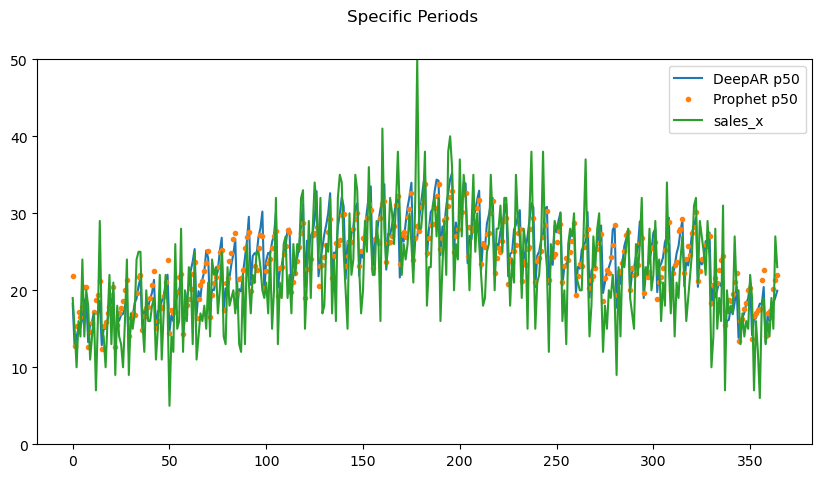

In [197]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = df_test_final_1_1[['DeepAR p50','Prophet p50','sales_x']].plot(ax=ax, style=['-','.'])
ax.set_ylim(0, 50)
#ax.set_xbound(lower='12-12-2017', upper='31-12-2017')
plot = plt.suptitle('Specific Periods')

In [198]:
df_test_final_1_1_Jan.head(2)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
0,2017-01-01,1,1,19,1-1,1,17.142857,17.318481,19,1.681519,...,19,13.092031,18.273352,23.108099,14.481007,21.839976,26.572280,15.038474,21.083323,27.128171
1,2017-01-02,1,1,15,1-1,2,17.000000,12.165764,15,2.834236,...,15,6.443378,12.557931,17.589214,8.835672,12.791130,17.247647,6.287601,12.369299,18.450996


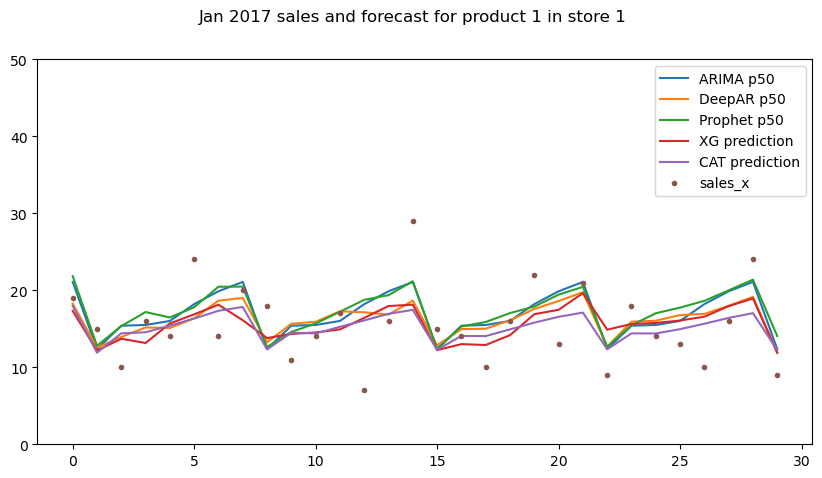

In [199]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = df_test_final_1_1_Jan[['ARIMA p50', 'DeepAR p50','Prophet p50','XG prediction', 'CAT prediction','sales_x']].plot(ax=ax, style=['-','-','-','-','-','.'])
ax.set_ylim(0, 50)
#ax.set_xbound(lower='12-12-2017', upper='31-12-2017')
plot = plt.suptitle('Jan 2017 sales and forecast for product 1 in store 1')

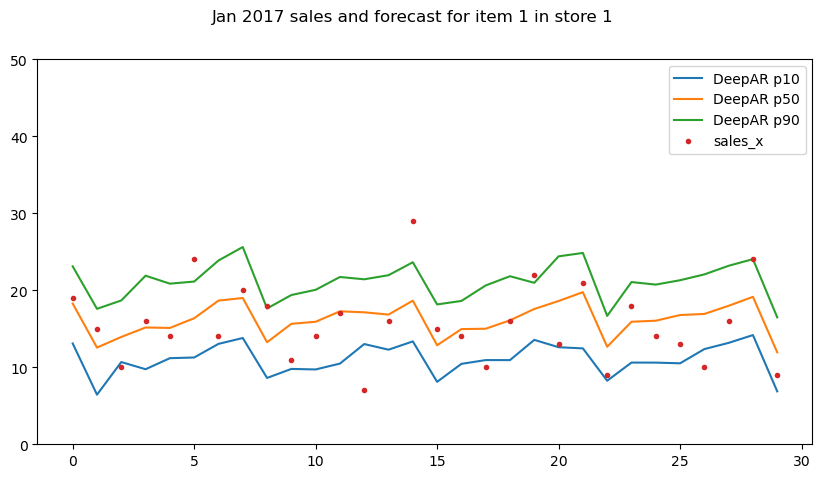

In [200]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = df_test_final_1_1_Jan[['DeepAR p10' ,'DeepAR p50', 'DeepAR p90','sales_x']].plot(ax=ax, style=['-','-','-','.'])
ax.set_ylim(0, 50)
#ax.set_xbound(lower='12-12-2017', upper='31-12-2017')
plot = plt.suptitle('Jan 2017 sales and forecast for item 1 in store 1')

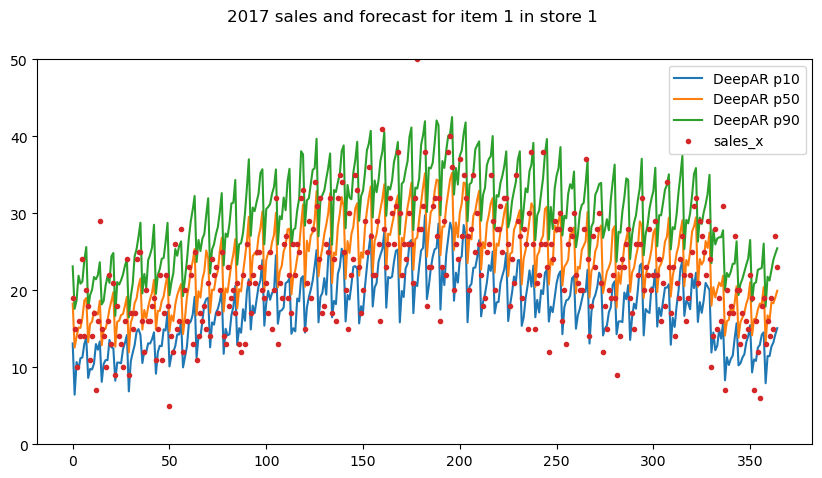

In [201]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = df_test_final_1_1[['DeepAR p10' ,'DeepAR p50', 'DeepAR p90','sales_x']].plot(ax=ax, style=['-','-','-','.'])
ax.set_ylim(0, 50)
#ax.set_xbound(lower='12-12-2017', upper='31-12-2017')
plot = plt.suptitle('2017 sales and forecast for item 1 in store 1')

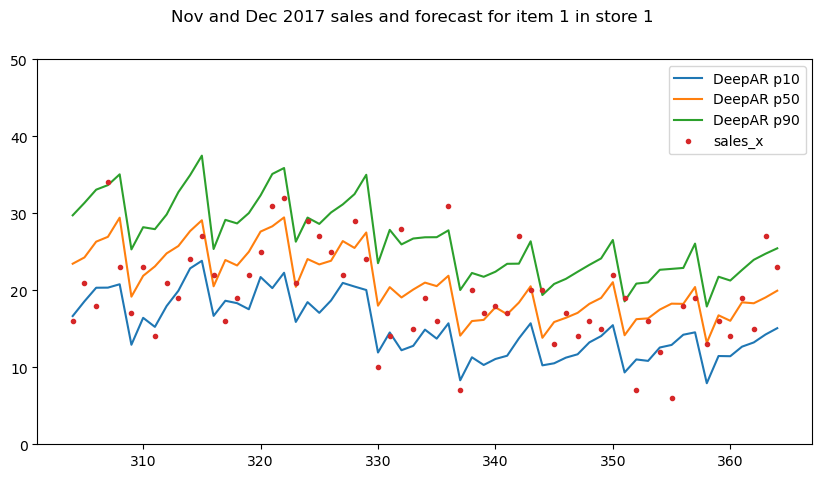

In [202]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = df_test_final_1_1_NovDec[['DeepAR p10' ,'DeepAR p50', 'DeepAR p90','sales_x']].plot(ax=ax, style=['-','-','-','.'])
ax.set_ylim(0, 50)
#ax.set_xbound(lower='12-12-2017', upper='31-12-2017')
plot = plt.suptitle('Nov and Dec 2017 sales and forecast for item 1 in store 1')

In [203]:
df_test_final.sample(5)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
85315,2017-09-28,4,24,80,24-4,28,80.000000,75.903183,80,4.096817,...,80,70.815025,82.444283,95.243851,71.721484,82.723796,93.797648,17.619937,55.714102,93.808267
45902,2017-10-05,6,13,65,13-6,5,71.142857,68.099983,65,-3.099983,...,65,59.524246,72.669312,85.018433,69.383357,76.740293,88.325902,14.060665,49.111432,84.162199
95960,2017-11-27,3,27,20,27-3,27,28.857143,23.364399,20,-3.364399,...,20,17.229824,23.397621,28.925941,14.597925,21.536947,29.057506,-2.290871,13.965420,30.221710
35718,2017-11-10,8,10,114,10-8,10,112.857143,109.056503,114,4.943497,...,114,102.949699,115.410995,128.840912,109.094308,121.001818,130.846805,35.590879,82.645096,129.699313
110465,2017-08-24,3,31,66,31-3,24,83.571429,82.155762,66,-16.155762,...,66,78.564766,89.488144,100.234306,73.520729,84.181381,94.391705,22.721960,55.724942,88.727925


In [204]:
df_test_final_7days = df_test_final[(df_test_final.date>'2017-01-01')]

In [205]:
df_test_final_7days = df_test_final_7days[(df_test_final_7days.date<'2017-01-08')]

In [206]:
df_test_final_7days.head()

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
1,2017-01-02,1,1,15,1-1,2,17.0,12.165764,15,2.834236,...,15,6.443378,12.557931,17.589214,8.835672,12.791130,17.247647,6.287601,12.369299,18.450996
2,2017-01-03,1,1,10,1-1,3,17.0,13.705684,10,-3.705684,...,10,10.678741,13.940229,18.678812,9.756908,15.349970,20.506746,9.281922,15.400247,21.518572
3,2017-01-04,1,1,16,1-1,4,17.0,13.153199,16,2.846801,...,16,9.747601,15.168463,21.893089,10.321535,17.171180,23.340119,9.338442,15.493176,21.647910
4,2017-01-05,1,1,14,1-1,5,16.0,15.693305,14,-1.693305,...,14,11.181156,15.107273,20.859018,10.991293,16.469481,21.002746,9.825613,16.016542,22.207471
5,2017-01-06,1,1,24,1-1,6,16.0,16.877373,24,7.122627,...,24,11.271238,16.362965,21.133337,11.722342,17.795096,23.035054,11.975618,18.202532,24.429445


In [207]:
RMSE_7_days_deep_AR  = np.mean(np.sqrt((df_test_final_7days['DeepAR p50'] - df_test_final_7days['sales_x']) ** 2)) 
print(RMSE_7_days_deep_AR)

5.319739441395167


In [208]:
RMSE_7_days_Prophet  = np.mean(np.sqrt((df_test_final_7days['Prophet p50'] - df_test_final_7days['sales_x']) ** 2)) 
print(RMSE_7_days_Prophet)

6.292679474933352


In [209]:
RMSE_7_days_Prophet  = np.mean(np.sqrt((df_test_final_7days['Prophet p50'] - df_test_final_7days['sales_x']) ** 2)) 
print(RMSE_7_days_Prophet)

6.292679474933352


In [210]:
RMSE_7_days_Cat  = np.mean(np.sqrt((df_test_final_7days['CAT prediction'] - df_test_final_7days['sales_x']) ** 2)) 
print(RMSE_7_days_Cat)

4.886170650467219


# Covert to By Day

In [211]:
df_test_final_new = df_test_final.copy()

In [212]:
df_test_final_new['date'] =  pd.to_datetime(df_test_final_new['date'])

In [213]:
df_test_final_new = df_test_final_new.set_index('date')

In [214]:
DailyFinal = df_test_final_new.resample('D').sum()

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1533720853.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DailyFinal = df_test_final_new.resample('D').sum()


In [215]:
DailyFinal.head()

,store,item,sales_x,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,abs_error,abs_error_percent,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2750,12750,23709,500,20948.571429,23734.595703,23709,-25.596183,2237.834311,5744.420467,...,23709,20845.143443,24995.135345,29277.705356,22441.241487,27040.152381,31564.281367,21317.346916,26395.786363,31474.225811
2017-01-02,2750,12750,15772,1000,20797.285714,15579.738281,15772,192.262105,2287.745347,8985.286188,...,15772,13344.722430,16968.554532,20648.412032,12631.943799,17202.684506,21552.209324,10420.207857,15571.647814,20723.087770
2017-01-03,2750,12750,18650,1500,20698.571429,18212.845703,18650,437.153708,2485.914113,7746.746944,...,18650,16018.456459,19640.363884,23519.778728,15845.611454,20395.838818,24861.573159,13927.467912,19143.684017,24359.900122
2017-01-04,2750,12750,18510,2000,20548.571429,18234.355469,18510,275.644182,2399.896305,7854.869525,...,18510,15957.582680,19732.617101,23640.794652,15785.972275,20535.728854,25035.820022,13910.142204,19191.218403,24472.294602
2017-01-05,2750,12750,19895,2500,20374.857143,19233.878906,19895,661.121997,2554.950305,7452.684397,...,19895,16997.674589,20919.546168,24957.955253,17351.235026,22033.378841,26531.375836,15579.229621,20924.071941,26268.914260


In [216]:
RMSE_daily_deep_AR  = np.mean(np.sqrt((DailyFinal['DeepAR p50'] - DailyFinal['sales_x']) ** 2)) 
print(RMSE_daily_deep_AR)

1375.3464340209555


In [217]:
RMSE_daily_XG  = np.mean(np.sqrt((DailyFinal['XG prediction'] - DailyFinal['sales_x']) ** 2)) 
print(RMSE_daily_XG)

925.5587462542808


In [218]:
RMSE_daily_Prophet  = np.mean(np.sqrt((DailyFinal['Prophet p50'] - DailyFinal['sales_x']) ** 2)) 
print(RMSE_daily_Prophet)

1552.1736455376042


In [219]:
RMSE_daily_CAT  = np.mean(np.sqrt((DailyFinal['CAT prediction'] - DailyFinal['sales_x']) ** 2)) 
print(RMSE_daily_CAT)

1042.2386824219936


# Monthly Final

In [220]:
MonthlyFinal = df_test_final_new.resample('M').sum()

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\164390942.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MonthlyFinal = df_test_final_new.resample('M').sum()


In [221]:
MonthlyFinal.head()

,store,item,sales_x,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,abs_error,abs_error_percent,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
date,,,,,,,,,,,,,,,,,,,,,
2017-01-31,85250,395250,617306,248000,6.228956e+05,600890.3125,617306,16415.702977,78218.200221,236047.075562,...,617306,533284.839743,6.532261e+05,7.787254e+05,553948.207287,6.961580e+05,8.348097e+05,469629.723187,654863.782319,840097.841451
2017-02-28,77000,357000,621369,203000,6.146851e+05,603874.0625,621369,17494.940930,75800.771943,204616.460921,...,621369,543259.120120,6.612705e+05,7.832739e+05,556977.027785,6.854281e+05,8.110163e+05,385112.874123,593731.187378,802349.500633
2017-03-31,85250,395250,822667,248000,8.106400e+05,799957.9375,822667,22709.042086,93195.492048,207961.397142,...,822667,719122.079740,8.619949e+05,1.012475e+06,728996.996584,8.710451e+05,1.009763e+06,387976.460982,656565.072722,925153.684462
2017-04-30,82500,382500,938862,232500,9.160630e+05,907294.3750,938862,31567.637978,99604.186127,183154.169212,...,938862,823345.272329,9.734426e+05,1.127310e+06,823865.051395,9.623123e+05,1.096818e+06,351790.093710,644573.701248,937357.308786
2017-05-31,85250,395250,1020686,248000,1.025612e+06,987380.1250,1020686,33305.864907,103873.966752,181902.578991,...,1020686,910451.932504,1.067575e+06,1.228743e+06,896670.736596,1.038850e+06,1.177602e+06,314604.656210,647586.812115,980568.968020


In [222]:
MonthlyFinal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   store              12 non-null     int64  
 1   item               12 non-null     int64  
 2   sales_x            12 non-null     int64  
 3   dayofmonth_x       12 non-null     int64  
 4   Mean_Amount_7D     12 non-null     float64
 5   XG prediction      12 non-null     float32
 6   sales_y            12 non-null     int64  
 7   error              12 non-null     float64
 8   abs_error          12 non-null     float64
 9   abs_error_percent  12 non-null     float64
 10  dayofweek          12 non-null     int64  
 11  quarter            12 non-null     int64  
 12  month              12 non-null     int64  
 13  year               12 non-null     int64  
 14  dayofyear          12 non-null     int64  
 15  dayofmonth_y       12 non-null     int64  
 16  

In [223]:
RMSE_monthly_deep_AR  = np.mean(np.sqrt((MonthlyFinal['DeepAR p50'] - MonthlyFinal['sales_x']) ** 2)) 
print(RMSE_monthly_deep_AR)

38993.67313210114


In [224]:
RMSE_monthly_XG  = np.mean(np.sqrt((MonthlyFinal['XG prediction'] - MonthlyFinal['sales_x']) ** 2)) 
print(RMSE_monthly_XG)

28128.21875


In [225]:
RMSE_monthly_Prophet  = np.mean(np.sqrt((MonthlyFinal['Prophet p50'] - MonthlyFinal['sales_x']) ** 2)) 
print(RMSE_monthly_Prophet)

36172.03079102783


In [226]:
RMSE_monthly_CAT  = np.mean(np.sqrt((MonthlyFinal['CAT prediction'] - MonthlyFinal['sales_x']) ** 2)) 
print(RMSE_monthly_CAT)

31677.893573676876


# Group by Store

In [227]:
df_test_final.sample(10)

,date,store,item,sales_x,ItemStoreCombined,dayofmonth_x,Mean_Amount_7D,XG prediction,sales_y,error,...,sales,DeepAR p10,DeepAR p50,DeepAR p90,Prophet p10,Prophet p50,Prophet p90,ARIMA p10,ARIMA p50,ARIMA p90
147661,2017-07-21,5,41,20,41-5,21,23.714286,25.300987,20,-5.300987,...,20,21.577114,27.460373,34.003727,19.758977,26.073011,30.637362,5.171902,15.378098,25.584294
164809,2017-07-14,2,46,123,46-2,14,111.714286,110.314842,123,12.685158,...,123,108.010506,119.744530,133.358521,106.526900,116.247443,127.747200,30.527623,67.584907,104.642190
153112,2017-06-27,10,42,53,42-10,27,59.714286,52.207439,53,0.792561,...,53,45.849594,53.944798,64.486702,43.927244,51.901083,62.545335,9.841159,29.566941,49.292723
152516,2017-11-08,8,42,40,42-8,8,52.857143,46.741268,40,-6.741268,...,40,43.522018,51.569107,60.160450,44.035020,51.114207,61.015379,6.571606,32.333965,58.096324
160549,2017-11-11,10,44,35,44-10,11,37.857143,44.072823,35,-9.072823,...,35,33.934292,43.145542,52.976089,36.876705,45.110190,51.249832,9.651847,31.256926,52.862004
137324,2017-03-26,7,38,66,38-7,26,54.142857,63.192902,66,2.807098,...,66,61.271954,71.406242,82.122086,60.957867,70.173600,78.732703,38.434822,56.287950,74.141078
71534,2017-12-26,6,20,36,20-6,26,31.571429,28.170197,36,7.829803,...,36,23.954746,30.898108,37.315609,25.103255,31.539193,37.732401,1.678557,24.844712,48.010868
75240,2017-02-20,7,21,21,21-7,20,23.285714,20.672319,21,0.327681,...,21,15.359821,21.214552,26.947857,14.892830,22.153341,28.184283,6.154729,16.045291,25.935853
41211,2017-11-28,3,12,97,12-3,28,91.714286,81.575523,97,15.424477,...,97,64.813118,77.959007,88.892258,68.546322,81.376238,88.632340,11.677300,56.625620,101.573940
155646,2017-06-06,7,43,42,43-7,6,46.714286,42.865593,42,-0.865593,...,42,38.696712,47.245731,55.855022,35.675943,42.739564,50.015548,7.487125,24.032355,40.577586


In [228]:
Store_Month_Test_Final = df_test_final_new.groupby(['store']).resample('M').sum()

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\2105311369.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_Month_Test_Final = df_test_final_new.groupby(['store']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\2105311369.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_Month_Test_Final = df_test_final_new.groupby(['store']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\2105311369.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify

In [229]:
Store_Month_Test_Final.tail(10)

store   item  sales_x  dayofmonth_x  Mean_Amount_7D  \
store date                                                              
10    2017-03-31  15500  39525    92660         24800    91191.428571   
      2017-04-30  15000  38250   106010         23250   103353.714286   
      2017-05-31  15500  39525   114351         24800   115146.714286   
      2017-06-30  15000  38250   119125         23250   118068.571429   
      2017-07-31  15500  39525   131638         24800   130340.142857   
      2017-08-31  15500  39525   115528         24800   117636.714286   
      2017-09-30  15000  38250   104924         23250   105213.571429   
      2017-10-31  15500  39525    99969         24800   101111.000000   
      2017-11-30  15000  38250   103815         23250   103232.428571   
      2017-12-31  15500  39525    77850         24800    79868.285714   

                  XG prediction  sales_y        error     abs_error  \
store date                                                            
10    2017-03-31   90769.914062    92660  1890.088846  10101.386171   
      2017-04-30  103197.789062   106010  2812.209677  10808.046618   
      2017-05-31  112384.179688   114351  1966.819551  11075.320509   
      2017-06-30  116508.625000   119125  2616.371943  10964.296267   
      2017-07-31  128270.195312   131638  3367.807516  12208.057444   
      2017-08-31  112731.750000   115528  2796.251745  10864.221239   
      2017-09-30  102214.718750   104924  2709.283484  10117.508223   
      2017-10-31   98586.734375    99969  1382.267210   9890.347746   
      2017-11-30  101843.375000   103815  1971.624264  10320.696201   
      2017-12-31   76624.914062    77850  1225.086482   8962.376288   

                  abs_error_percent  ...   sales     DeepAR p10  \
store date                           ...                          
10    2017-03-31       19238.156645  ...   92660   81349.777073   
      2017-04-30       17184.078502  ...  106010   93231.844699   
      2017-05-31       17129.615480  ...  114351  103159.875446   
      2017-06-30       15369.604408  ...  119125  109200.328800   
      2017-07-31       16344.520331  ...  131638  117298.576929   
      2017-08-31       16285.322175  ...  115528  102638.884300   
      2017-09-30       16419.608060  ...  104924   93659.832050   
      2017-10-31       17546.079888  ...   99969   90071.026391   
      2017-11-30       16908.141721  ...  103815   89345.958596   
      2017-12-31       20454.018939  ...   77850   67266.631374   

                     DeepAR p50     DeepAR p90    Prophet p10    Prophet p50  \
store date                                                                     
10    2017-03-31   96662.920946  112709.274252   82643.392172   97781.926424   
      2017-04-30  109278.379477  125611.903063   93167.652151  107957.105139   
      2017-05-31  119937.446098  137122.025343  101726.936507  116918.814032   
      2017-06-30  125680.229891  142802.838535  105795.222248  120452.881042   
      2017-07-31  135562.108982  154463.331270  115166.145999  130332.581962   
      2017-08-31  120734.015291  139101.131012  102478.908592  117639.435718   
      2017-09-30  110002.043329  126807.284760   93033.870725  107701.731945   
      2017-10-31  106279.553680  123126.349306   89794.988296  104982.571504   
      2017-11-30  105183.333399  121365.554955   91140.454619  105923.456127   
      2017-12-31   81642.585665   96400.306601   71948.762458   87132.636547   

                    Prophet p90     ARIMA p10     ARIMA p50      ARIMA p90  
store date                                                                  
10    2017-03-31  112592.861416  44022.515154  73616.535823  103210.556491  
      2017-04-30  122397.234755  39892.123207  72266.441676  104640.760144  
      2017-05-31  131803.113305  35701.670235  72606.494857  109511.319478  
      2017-06-30  134846.070771  32697.414258  71464.236187  110231.058116  
      2017-07-31  145221.920284  31026.869202  74006.741467 

In [230]:
#RMSE_Store_item_XG  = np.mean(np.sqrt((Store_item_Month_Test_Final['XG prediction'] - Store_item_Month_Test_Final['sales_x']) ** 2)) 
#print(RMSE_Store_item_XG)

In [231]:
RMSE_Store_Month_deep_AR  = np.mean(np.sqrt((Store_Month_Test_Final['DeepAR p50'] - Store_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_Month_deep_AR)

3899.367313210117


In [232]:
RMSE_Store_Month_XG  = np.mean(np.sqrt((Store_Month_Test_Final['XG prediction'] - Store_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_Month_XG)

2812.82119140625


In [233]:
RMSE_Store_Month_Prophet  = np.mean(np.sqrt((Store_Month_Test_Final['Prophet p50'] - Store_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_Month_Prophet)

3617.203079102781


In [234]:
RMSE_Store_Month_Cat  = np.mean(np.sqrt((Store_Month_Test_Final['CAT prediction'] - Store_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_Month_Cat)

3167.7893573676865


In [235]:
Store_Month_Test_Final.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 120 entries, (1, Timestamp('2017-01-31 00:00:00', freq='M')) to (10, Timestamp('2017-12-31 00:00:00', freq='M'))
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   store              120 non-null    int64  
 1   item               120 non-null    int64  
 2   sales_x            120 non-null    int64  
 3   dayofmonth_x       120 non-null    int64  
 4   Mean_Amount_7D     120 non-null    float64
 5   XG prediction      120 non-null    float32
 6   sales_y            120 non-null    int64  
 7   error              120 non-null    float64
 8   abs_error          120 non-null    float64
 9   abs_error_percent  120 non-null    float64
 10  dayofweek          120 non-null    int64  
 11  quarter            120 non-null    int64  
 12  month              120 non-null    int64  
 13  year               120 non-null    int64  
 14  dayofyear          120 non-null

# By Store by Item

In [236]:
Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default 

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default 

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default 

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default 

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default 

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default 

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default 

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Store_item_Month_Test_Final = df_test_final_new.groupby(['store','item']).resample('M').sum()
C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\1705468883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default 

In [237]:
Store_item_Month_Test_Final.head()

store  item  sales_x  dayofmonth_x  Mean_Amount_7D  \
store item date                                                             
1     1    2017-01-31     31    31      485           496      491.857143   
           2017-02-28     28    28      487           406      476.714286   
           2017-03-31     31    31      561           496      569.857143   
           2017-04-30     30    30      677           465      638.142857   
           2017-05-31     31    31      773           496      789.571429   

                       XG prediction  sales_y      error   abs_error  \
store item date                                                        
1     1    2017-01-31     480.415466      485   4.584548  113.010310   
           2017-02-28     478.297363      487   8.702636  101.919600   
           2017-03-31     634.498413      561 -73.498398  132.310261   
           2017-04-30     730.647583      677 -53.647593  111.199274   
           2017-05-31     789.250671      773 -16.250664  144.276695   

                       abs_error_percent  ...  sales  DeepAR p10  DeepAR p50  \
store item date                           ...                                  
1     1    2017-01-31         824.910486  ...    485  342.879231  501.820342   
           2017-02-28         728.175568  ...    487  363.522437  509.009387   
           2017-03-31         848.498417  ...    561  495.013380  671.248390   
           2017-04-30         559.022302  ...    677  568.808999  758.697426   
           2017-05-31         651.414115  ...    773  630.302674  831.289663   

                        DeepAR p90  Prophet p10  Prophet p50  Prophet p90  \
store item date                                                             
1     1    2017-01-31   652.780518   366.030498   533.526538   701.115136   
           2017-02-28   663.955324   357.975261   518.578700   664.407788   
           2017-03-31   861.033880   505.976882   676.364568   841.408395   
           2017-04-30   950.430103   576.130601   731.378170   890.925884   
           2017-05-31  1038.301241   618.803104   792.000923   958.387348   

                        ARIMA p10   ARIMA p50   ARIMA p90  
store item date                                            
1     1    2017-01-31  318.955514  522.590876  726.226238  
           2017-02-28  263.519267  473.738008  683.956748  
           2017-03-31  264.921146  523.450258  781.979369  
           2017-04-30  241.063079  514.690714  788.318348  
           2017-05-31  211.963423  517.000729  822.038036  

[5 rows x 28 columns]

In [238]:
RMSE_Store_item_Month_deep_AR  = np.mean(np.sqrt((Store_item_Month_Test_Final['DeepAR p50'] - Store_item_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_item_Month_deep_AR)

81.497849666593


In [239]:
RMSE_Store_item_XG  = np.mean(np.sqrt((Store_item_Month_Test_Final['XG prediction'] - Store_item_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_item_XG)

71.56527550252278


In [240]:
RMSE_Store_item_Month_Prophet  = np.mean(np.sqrt((Store_item_Month_Test_Final['Prophet p50'] - Store_item_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_item_Month_Prophet)

84.60514842402347


In [241]:
RMSE_Store_item_Month_Cat  = np.mean(np.sqrt((Store_item_Month_Test_Final['CAT prediction'] - Store_item_Month_Test_Final['sales_x']) ** 2)) 
print(RMSE_Store_item_Month_Cat)

78.06908873113612


# Final Results

In [242]:
print(color.BOLD +"RMSE ")
print ('\033[0m')

print("Root Mean Squared Error -RMSE")
print("RMSE Prophet",Prophet_Results['RMSE'])
print("RMSE DeepAR_Results",DeepAR_Results['RMSE'])  # Therse result are terribe as the forecast is completely awful ()
print("RMSE XG Boost",XG_Results['RMSE'])
print("RMSE ARIMA",ARIMA_Results['RMSE'])
print("RMSE AUTO",Auto_Results['RMSE'])
print("RMSE",CAT_Results['RMSE'])

RMSE 

Root Mean Squared Error -RMSE
RMSE Prophet 6.855061314747113
RMSE DeepAR_Results 6.503165773412589
RMSE XG Boost 6.313282459342643
RMSE ARIMA 17.779052079414143
RMSE AUTO 559.2934381591892
RMSE 6.3562880491751015


In [243]:
df_test_final.sum()

C:\Users\sasha\AppData\Local\Temp\ipykernel_15380\3497409492.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test_final.sum()


store                                                          1003750
item                                                           4653750
sales_x                                                       10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofmonth_x                                                   2869000
Mean_Amount_7D                                         10726328.571429
XG prediction                                               10396203.0
sales_y                                                       10733740
error                                                    337538.531189
abs_error                                                1152174.04883
abs_error_percent                                       2315121.596477
dayofweek                                                       549000
quarter                                                         458000
month                                                          1191000
year  

In [244]:
df_test.sum()


store                                                          1003750
item                                                           4653750
sales                                                         10733740
ItemStoreCombined    1-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11...
dayofweek                                                       549000
quarter                                                         458000
month                                                          1191000
year                                                         368102500
dayofyear                                                     33397500
dayofmonth                                                     2869000
weekofyear                                                     4849000
dtype: object